# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [ ]:
df = pd.read_csv(consts.DATASET_LEAN) # Armazenando o dataset tratado em uma variável

In [2]:
df # Exbindo uma visão geral do dataset

Education Marital_Status  Children  HasChildren  Age AgeGroup   Income  \
0     Graduation         Single         0            0   57    46-60  58138.0   
1     Graduation         Single         2            1   60    46-60  46344.0   
2     Graduation        Partner         0            0   49    46-60  71613.0   
3     Graduation        Partner         1            1   30    18-30  26646.0   
4            PhD        Partner         1            1   33    31-45  58293.0   
...          ...            ...       ...          ...  ...      ...      ...   
2200  Graduation        Partner         1            1   47    46-60  61223.0   
2201         PhD        Partner         3            1   68      61+  64014.0   
2202  Graduation         Single         0            0   33    31-45  56981.0   
2203      Master        Partner         1            1   58    46-60  69245.0   
2204         PhD        Partner         2            1   60    46-60  52869.0   

      Recency  Complain  Days_Since_Enrolled  Years_Since_Enrolled  \
0          58         0                  663                     1   
1          38         0                  113                     0   
2          26         0                  312                     0   
3          26         0                  139                     0   
4          94         0                  161                     0   
...       ...       ...                  ...                   ...   
2200       46         0                  381                     1   
2201       56         0                   19                     0   
2202       91         0                  155                     0   
2203        8         0                  156                     0   
2204       40         0                  622                     1   

      NumDealsPurchases  NumWebVisitsMonth  NumTotalPurchases  \
0                     3                  7                 22   
1                     2                  5                  4   
2                     1                  4                 20   
3                     2                  6                  6   
4                     5                  5                 14   
...                 ...                ...                ...   
2200                  2                  5                 16   
2201                  7                  7                 15   
2202                  1                  6                 18   
2203                  2                  3                 21   
2204                  3                  7                  8   

      MntRegularProds  MntGoldProds  MntTotal  AcceptedCmpTotal  \
0                1529            88      1617                 0   
1                  21             6        27                 0   
2                 734            42       776                 0   
3                  48             5        53                 0   
4                 407            15       422                 0   
...               ...           ...       ...               ...   
2200             1094           247      1341                 0   
2201              436             8       444                 1   
2202             1217            24      1241                 1   
2203              782            61       843                 0   
2204              151            21       172                 0   

      HasAcceptedCmp  Response  
0                  0         1  
1                  0         0  
2                  0         0  
3                  0         0  
4                  0         0  
...              ...       ...  
2200               0         0  
2201               1         0  
2202               1         0  
2203               0         0  
2204               0         1  

[2205 rows x 20 columns]

In [3]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2205 non-null   object 
 1   Marital_Status        2205 non-null   object 
 2   Children              2205 non-null   int64  
 3   HasChildren           2205 non-null   int64  
 4   Age                   2205 non-null   int64  
 5   AgeGroup              2205 non-null   object 
 6   Income                2205 non-null   float64
 7   Recency               2205 non-null   int64  
 8   Complain              2205 non-null   int64  
 9   Days_Since_Enrolled   2205 non-null   int64  
 10  Years_Since_Enrolled  2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebVisitsMonth     2205 non-null   int64  
 13  NumTotalPurchases     2205 non-null   int64  
 14  MntRegularProds       2205 non-null   int64  
 15  MntGoldProds         

In [4]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

Children  HasChildren     Age    Income  Recency  Complain  \
count   2205.00      2205.00 2205.00   2205.00  2205.00   2205.00   
mean       0.95         0.72   45.10  51622.09    49.01      0.01   
std        0.75         0.45   11.71  20713.06    28.93      0.09   
min        0.00         0.00   18.00   1730.00     0.00      0.00   
25%        0.00         0.00   37.00  35196.00    24.00      0.00   
50%        1.00         1.00   44.00  51287.00    49.00      0.00   
75%        1.00         1.00   55.00  68281.00    74.00      0.00   
max        3.00         1.00   74.00 113734.00    99.00      1.00   

       Days_Since_Enrolled  Years_Since_Enrolled  NumDealsPurchases  \
count              2205.00               2205.00            2205.00   
mean                353.72                  0.48               2.32   
std                 202.56                  0.50               1.89   
min                   0.00                  0.00               0.00   
25%                 180.00                  0.00               1.00   
50%                 356.00                  0.00               2.00   
75%                 529.00                  1.00               3.00   
max                 699.00                  1.00              15.00   

       NumWebVisitsMonth  NumTotalPurchases  MntRegularProds  MntGoldProds  \
count            2205.00            2205.00          2205.00       2205.00   
mean                5.34              12.57           562.76         44.06   
std                 2.41               7.18           575.94         51.74   
min                 0.00               0.00             4.00          0.00   
25%                 3.00               6.00            56.00          9.00   
50%                 6.00              12.00           343.00         25.00   
75%                 7.00              18.00           964.00         56.00   
max                20.00              32.00          2491.00        321.00   

       MntTotal  AcceptedCmpTotal  HasAcceptedCmp  Response  
count   2205.00           2205.00         2205.00   2205.00  
mean     606.82              0.30            0.21      0.15  
std      601.68              0.68            0.41      0.36  
min        5.00              0.00            0.00      0.00  
25%       69.00              0.00            0.00      0.00  
50%      397.00              0.00            0.00      0.00  
75%     1047.00              0.00            0.00      0.00  
max     2525.00              4.00            1.00      1.00

In [5]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

Education Marital_Status AgeGroup
count         2205           2205     2205
unique           5              2        4
top     Graduation        Partner    31-45
freq          1113           1422      958

In [6]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Education               0
Marital_Status          0
Children                0
HasChildren             0
Age                     0
AgeGroup                0
Income                  0
Recency                 0
Complain                0
Days_Since_Enrolled     0
Years_Since_Enrolled    0
NumDealsPurchases       0
NumWebVisitsMonth       0
NumTotalPurchases       0
MntRegularProds         0
MntGoldProds            0
MntTotal                0
AcceptedCmpTotal        0
HasAcceptedCmp          0
Response                0
dtype: int64

### Definindo as hue columns

Definindo as colunas que serão utilizadas como hue columns nas análises a seguir para gerar o máximo de insights relevantes para o projeto.

In [7]:
hue_columns = [ # Definindo as hue columns
    'HasChildren', 
    'Marital_Status', 
    'Education',
    'AgeGroup',
    'Years_Since_Enrolled',
    'HasAcceptedCmp', 
    'Response', 
] 

### Criando os histplots de acordo com as hue columns, para extrair seus insights

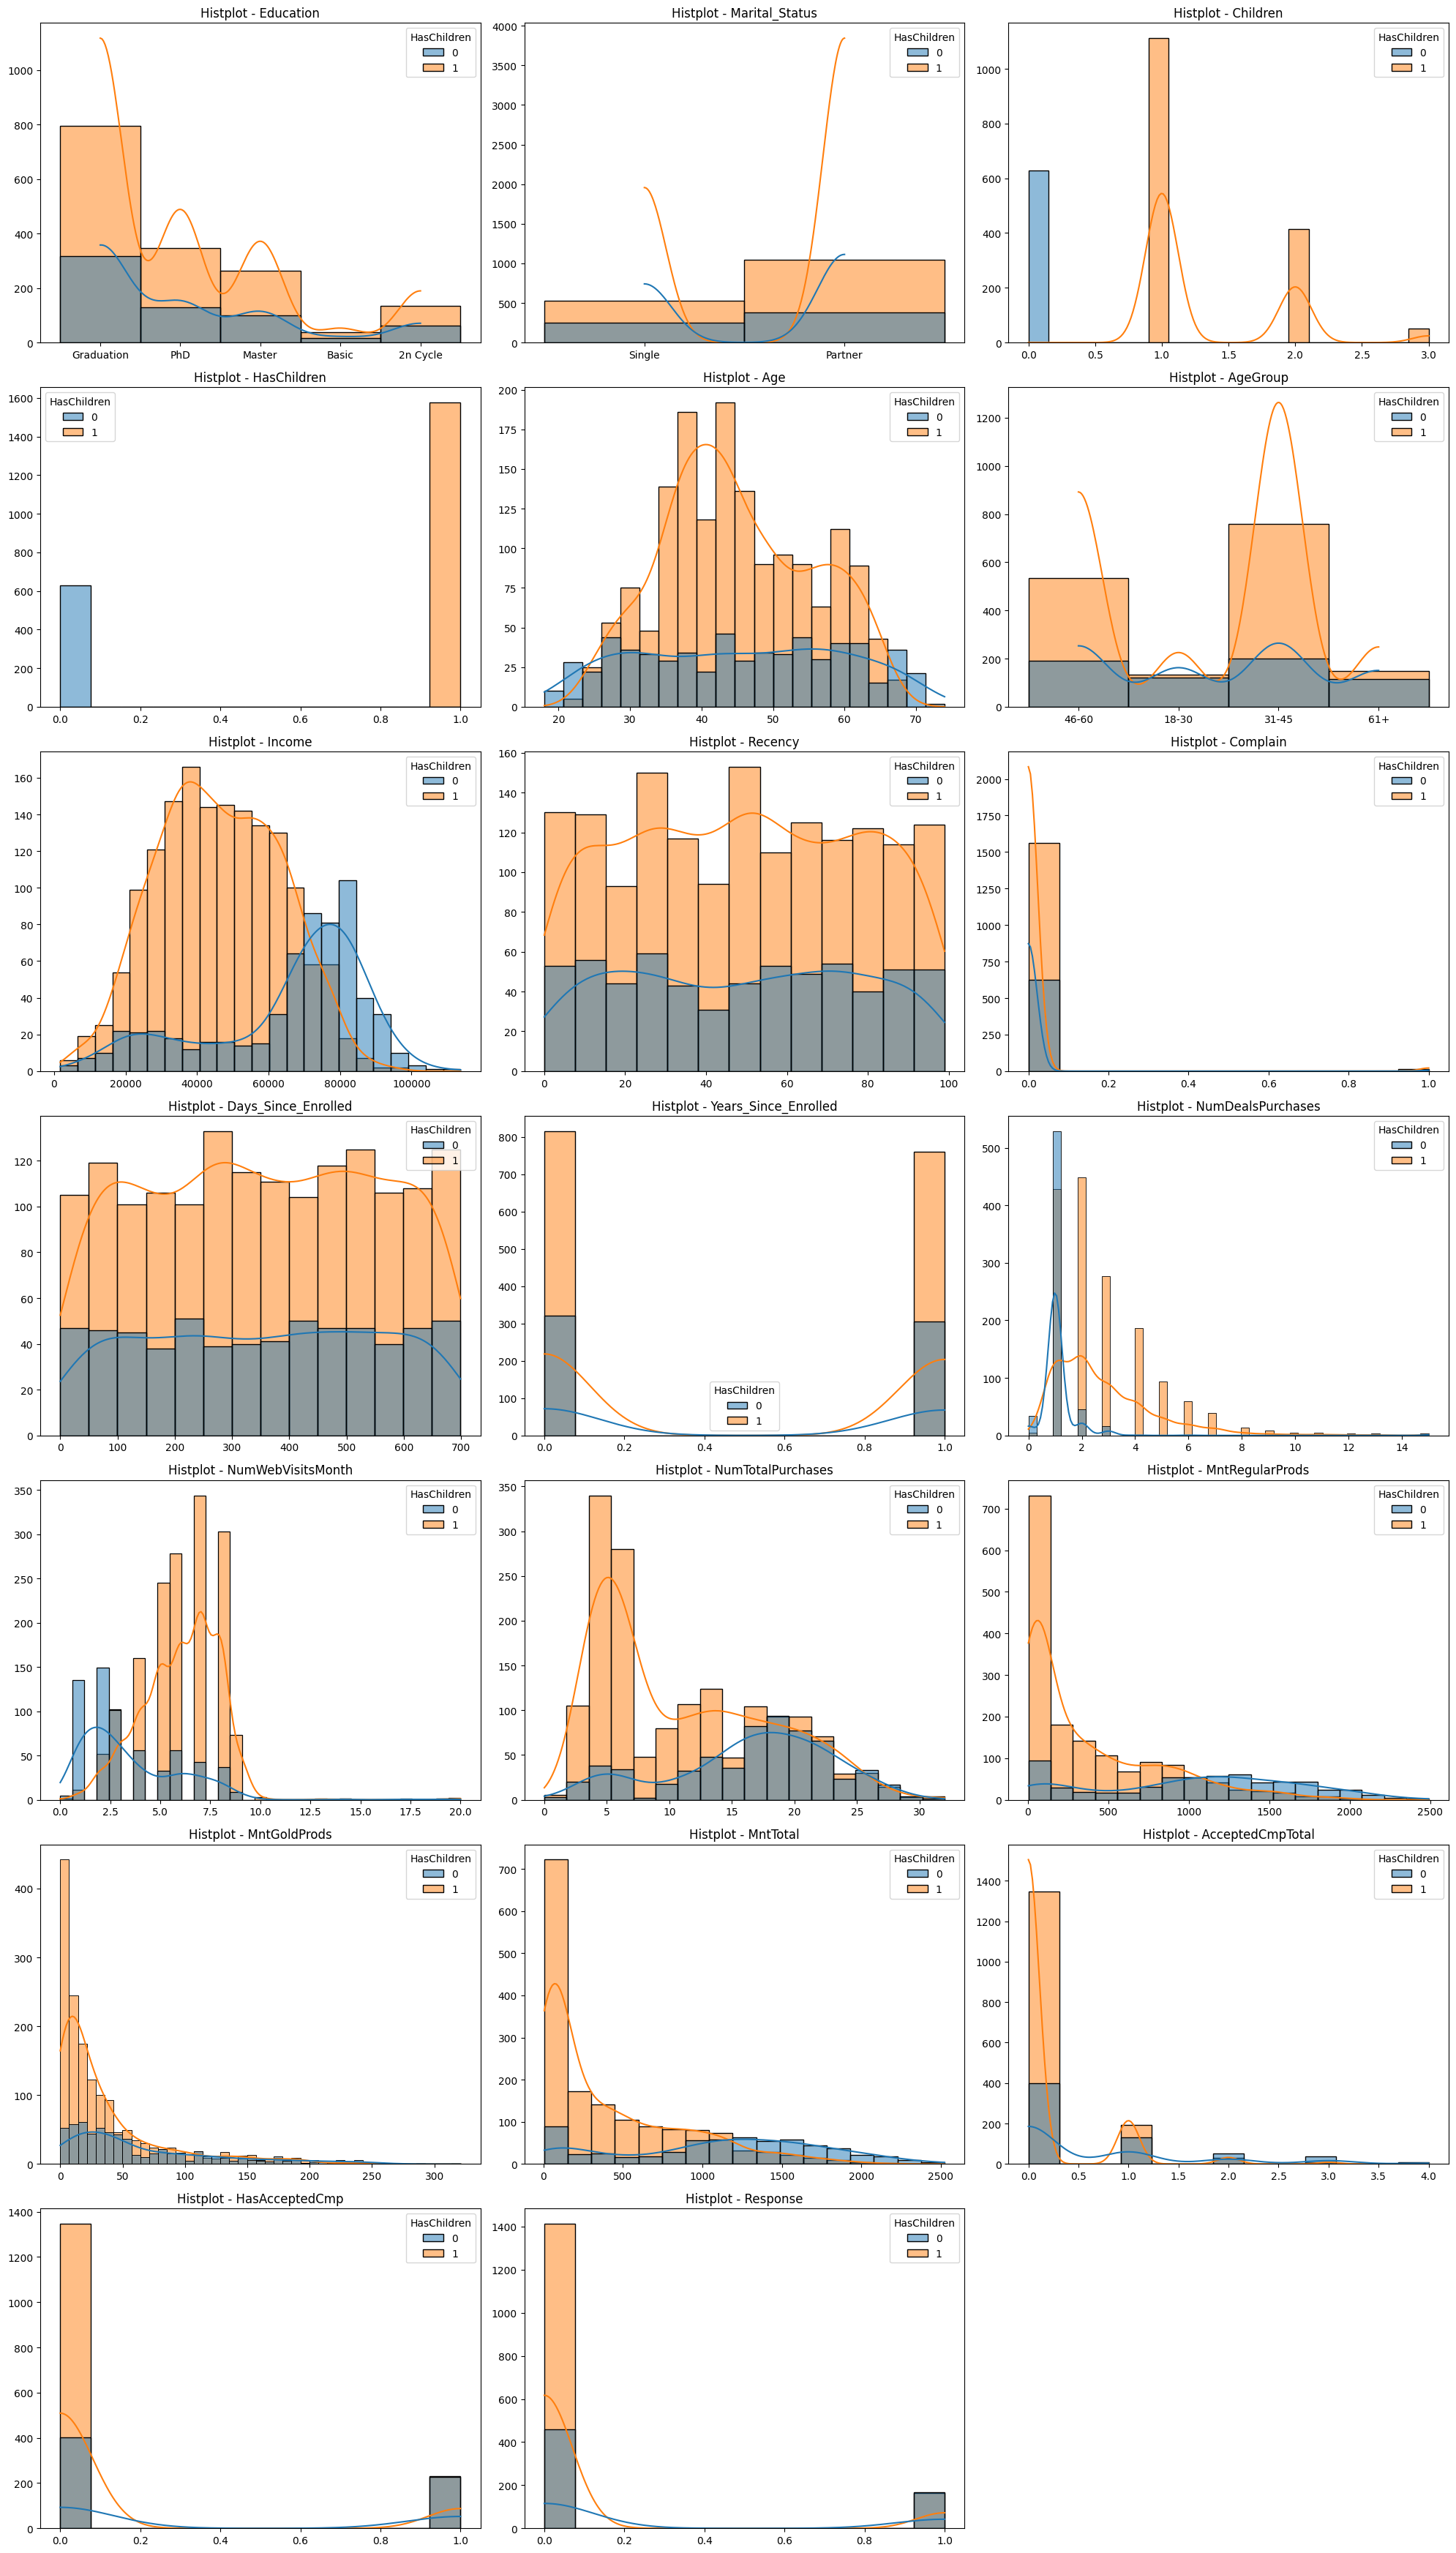

In [8]:
fn_charts.histplots(df, df.columns, hue_columns[0], kde=True) # Criando o histplot com base na lista de hue columns

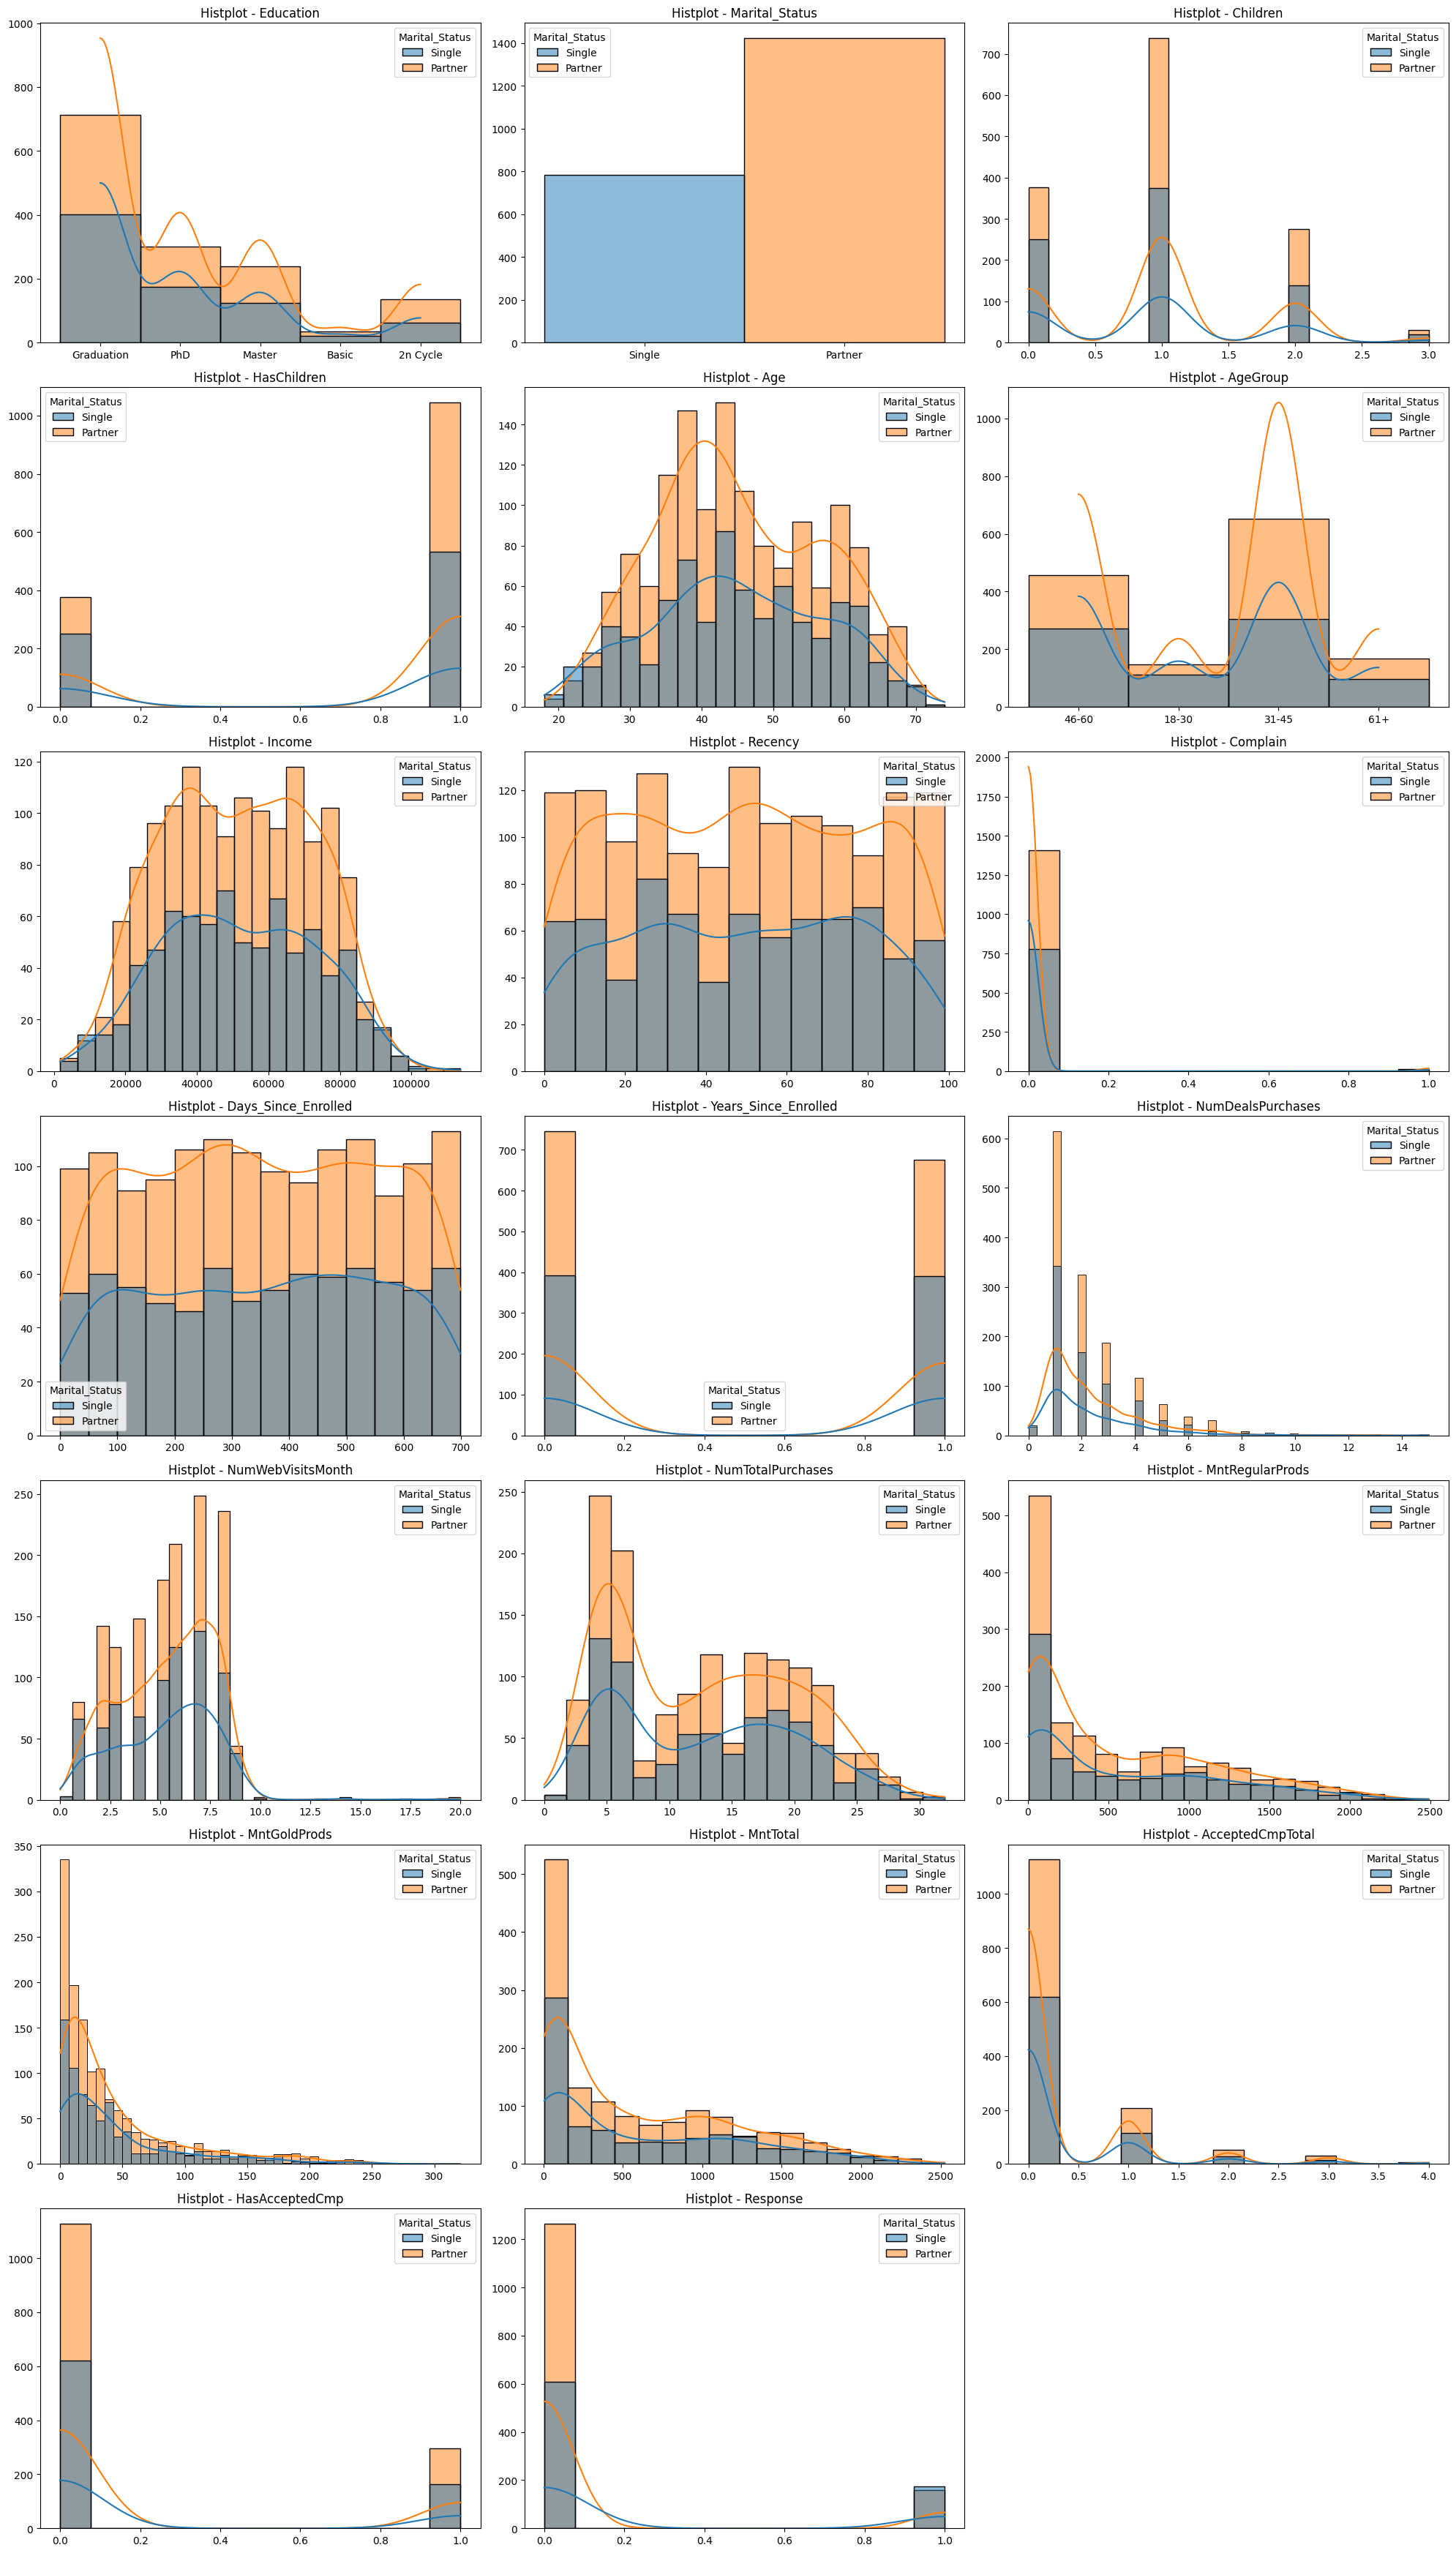

In [9]:
fn_charts.histplots(df, df.columns, hue_columns[1], kde=True) # Criando o histplot com base na lista de hue columns

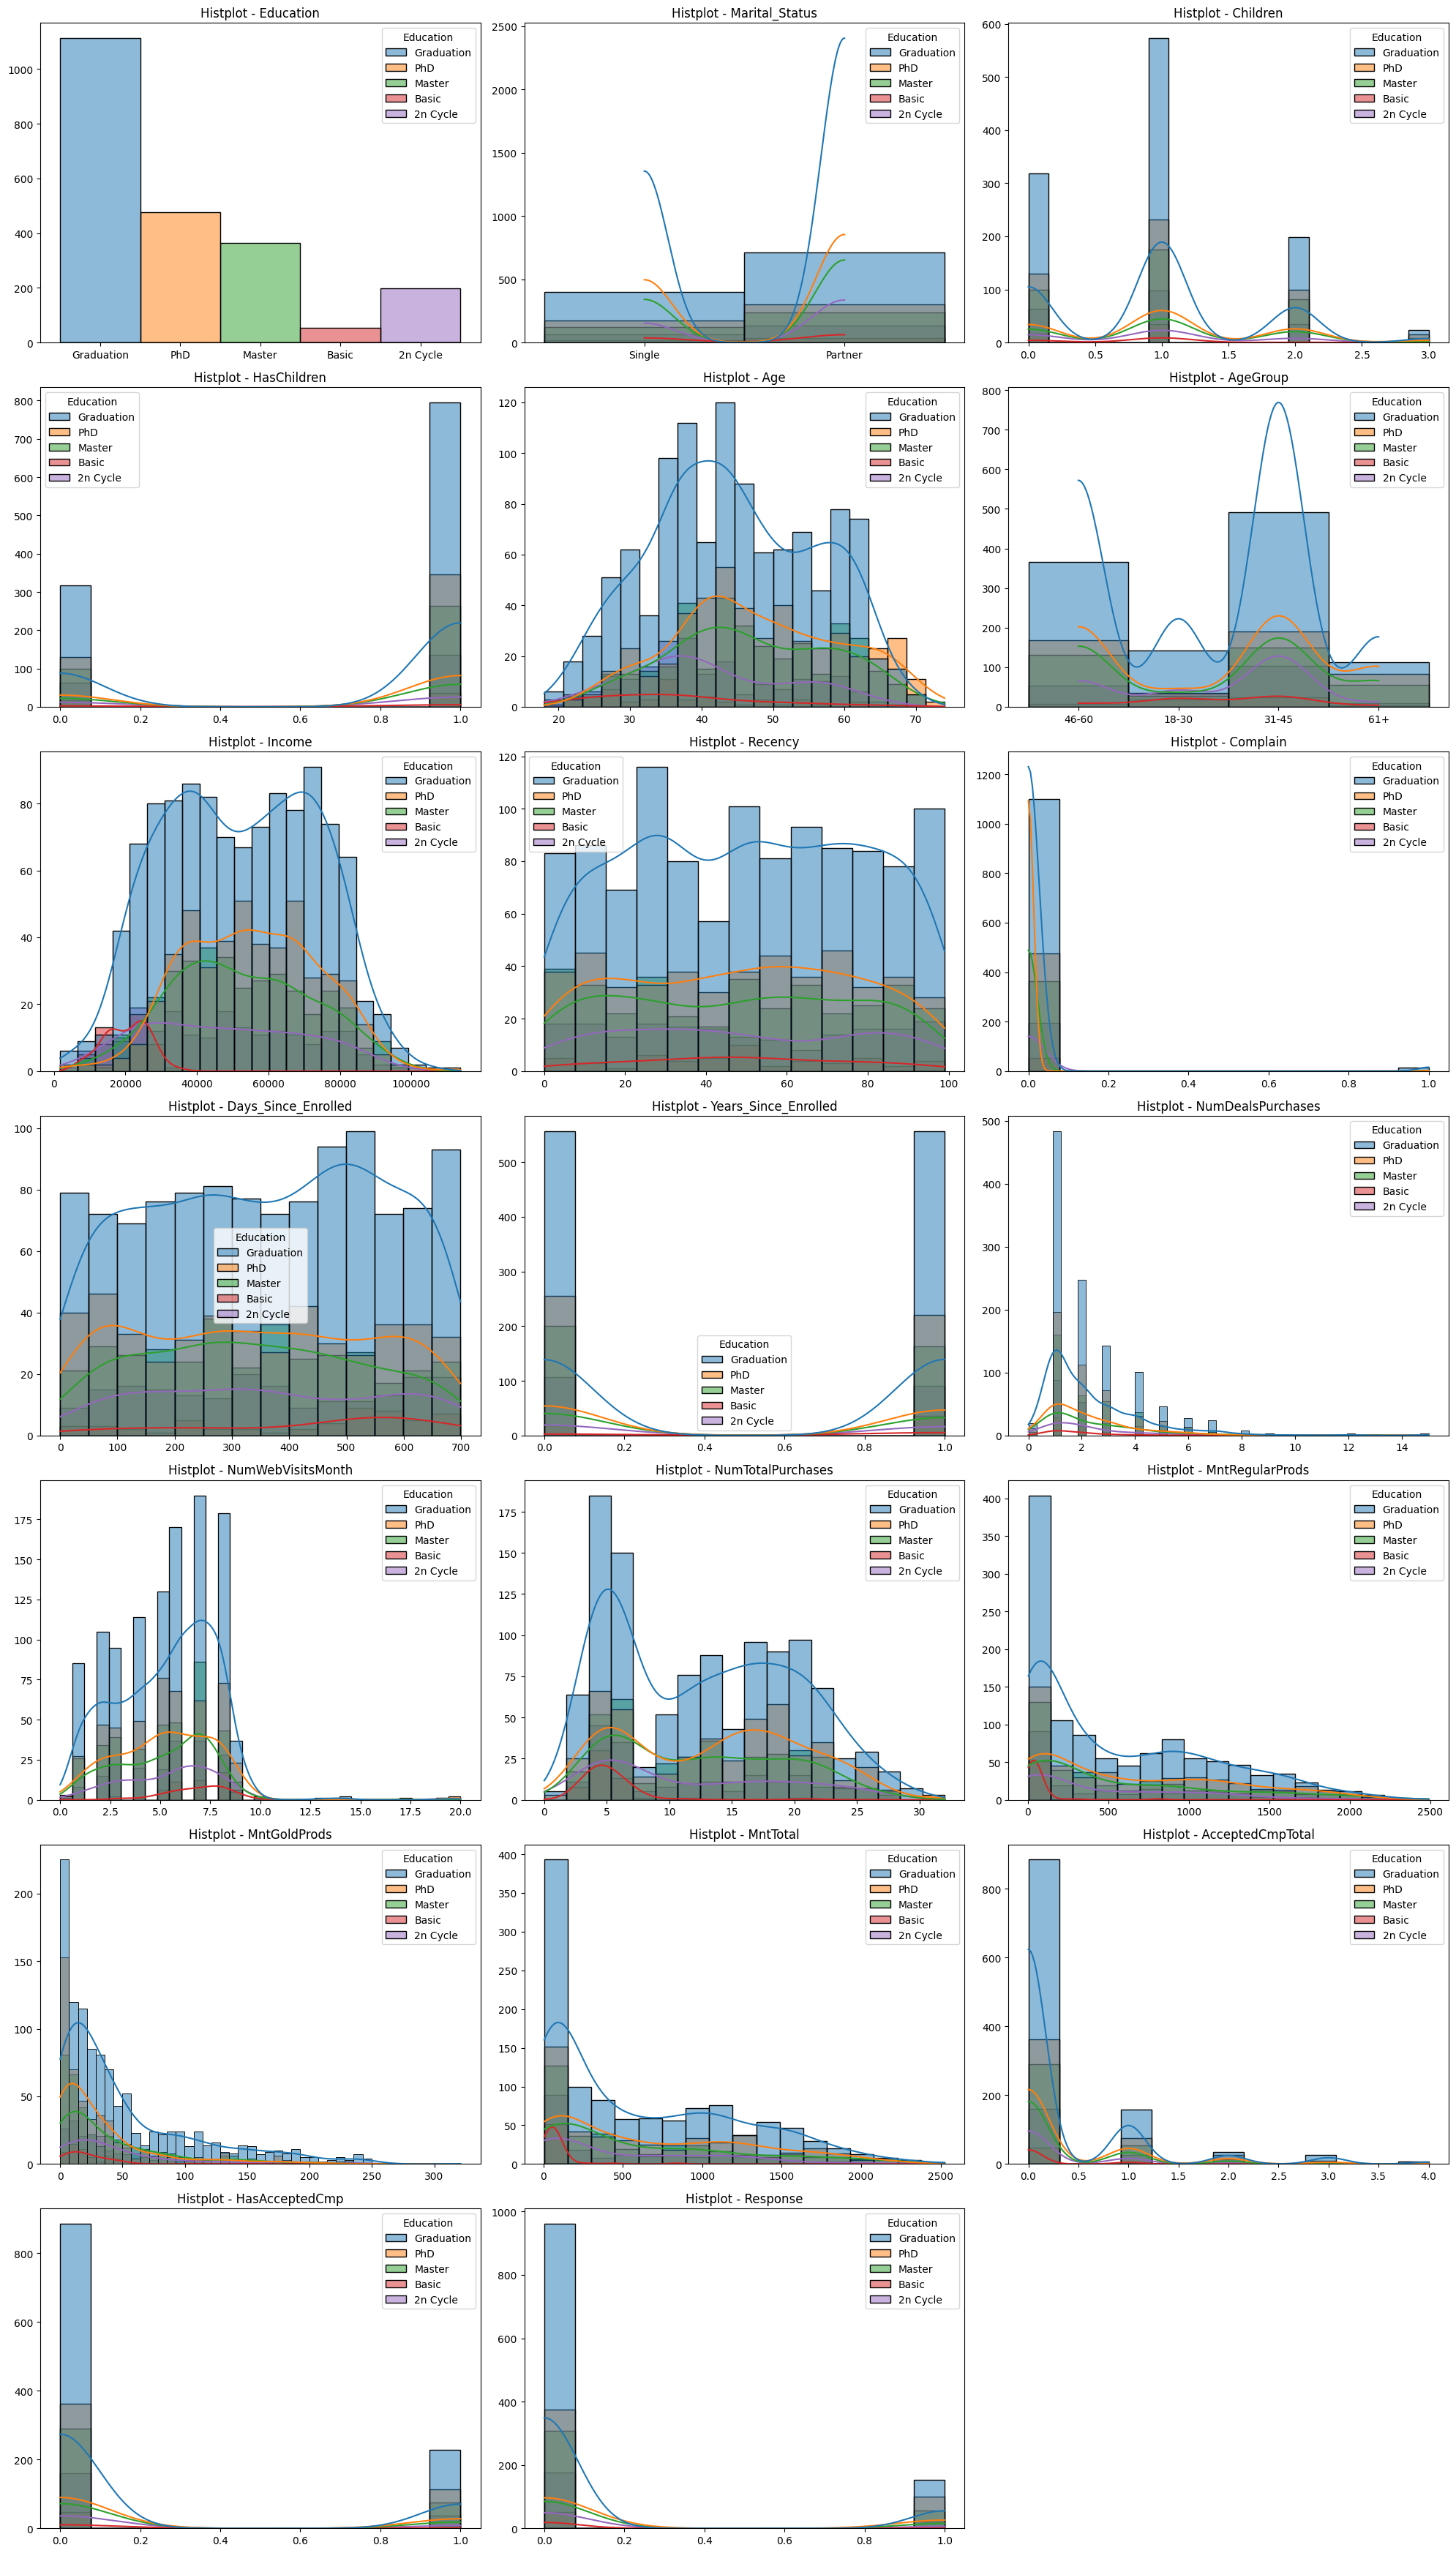

In [10]:
fn_charts.histplots(df, df.columns, hue_columns[2], kde=True) # Criando o histplot com base na lista de hue columns

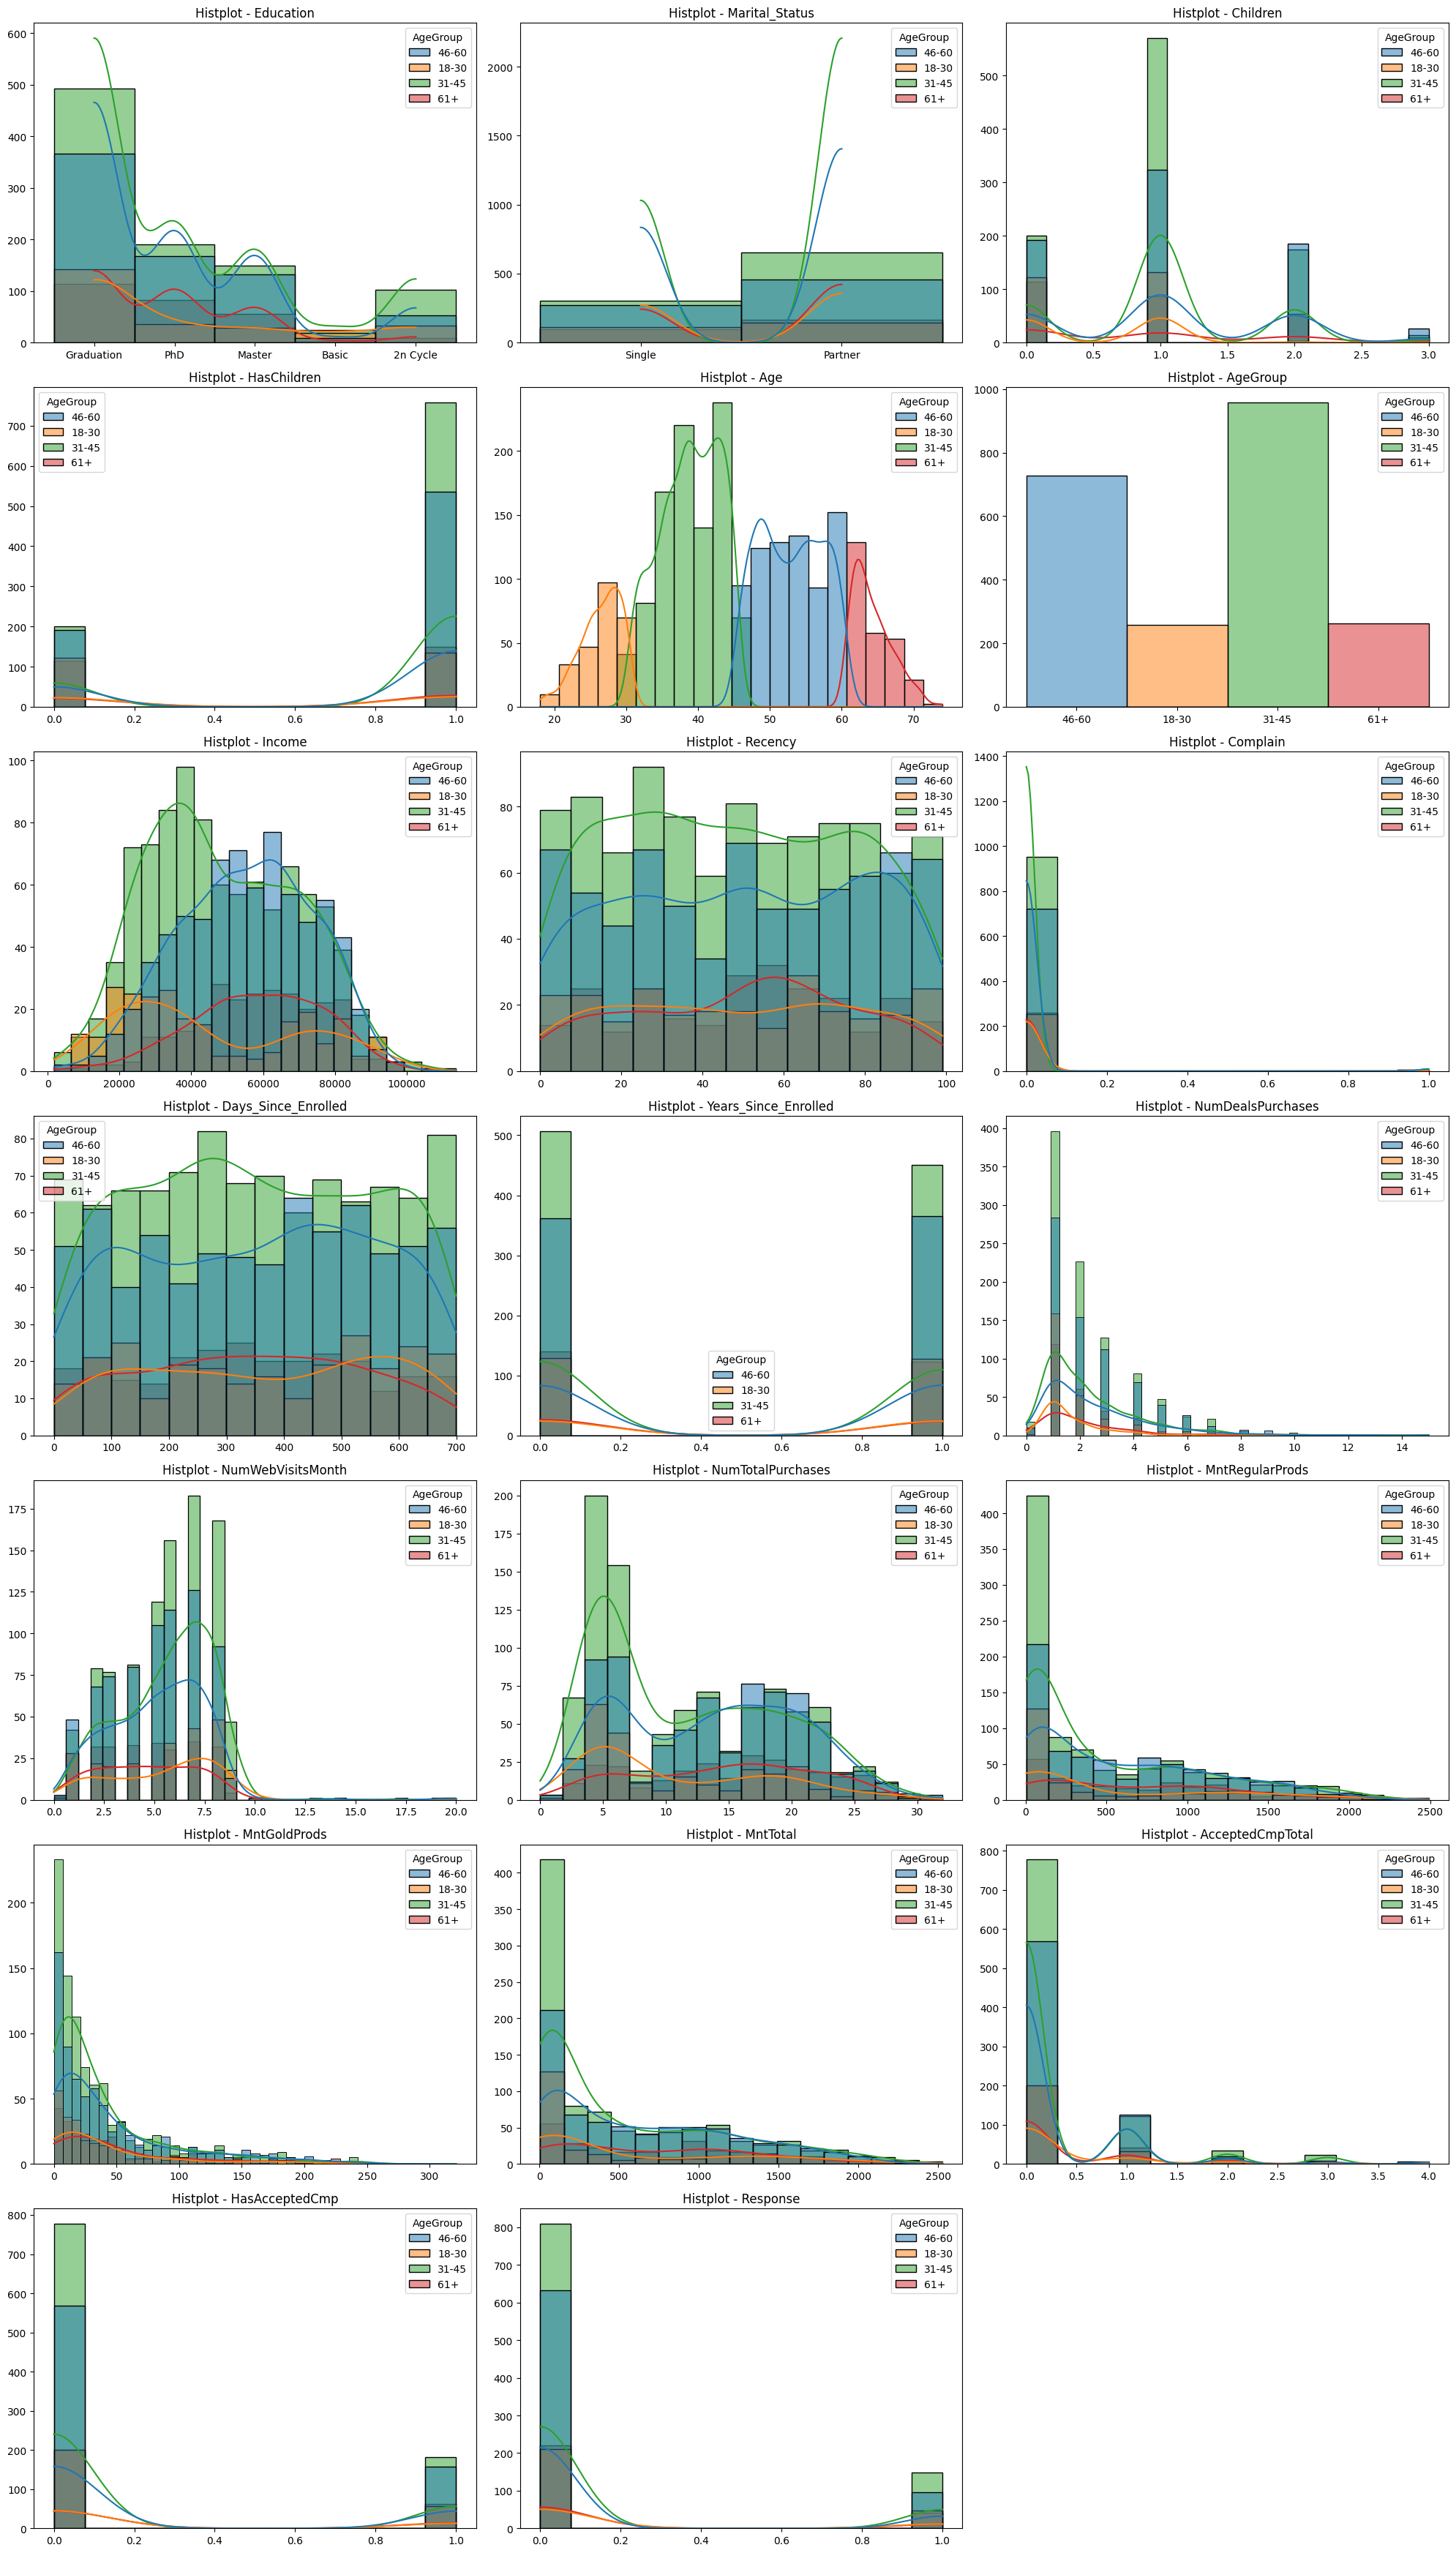

In [11]:
fn_charts.histplots(df, df.columns, hue_columns[3], kde=True) # Criando o histplot com base na lista de hue columns

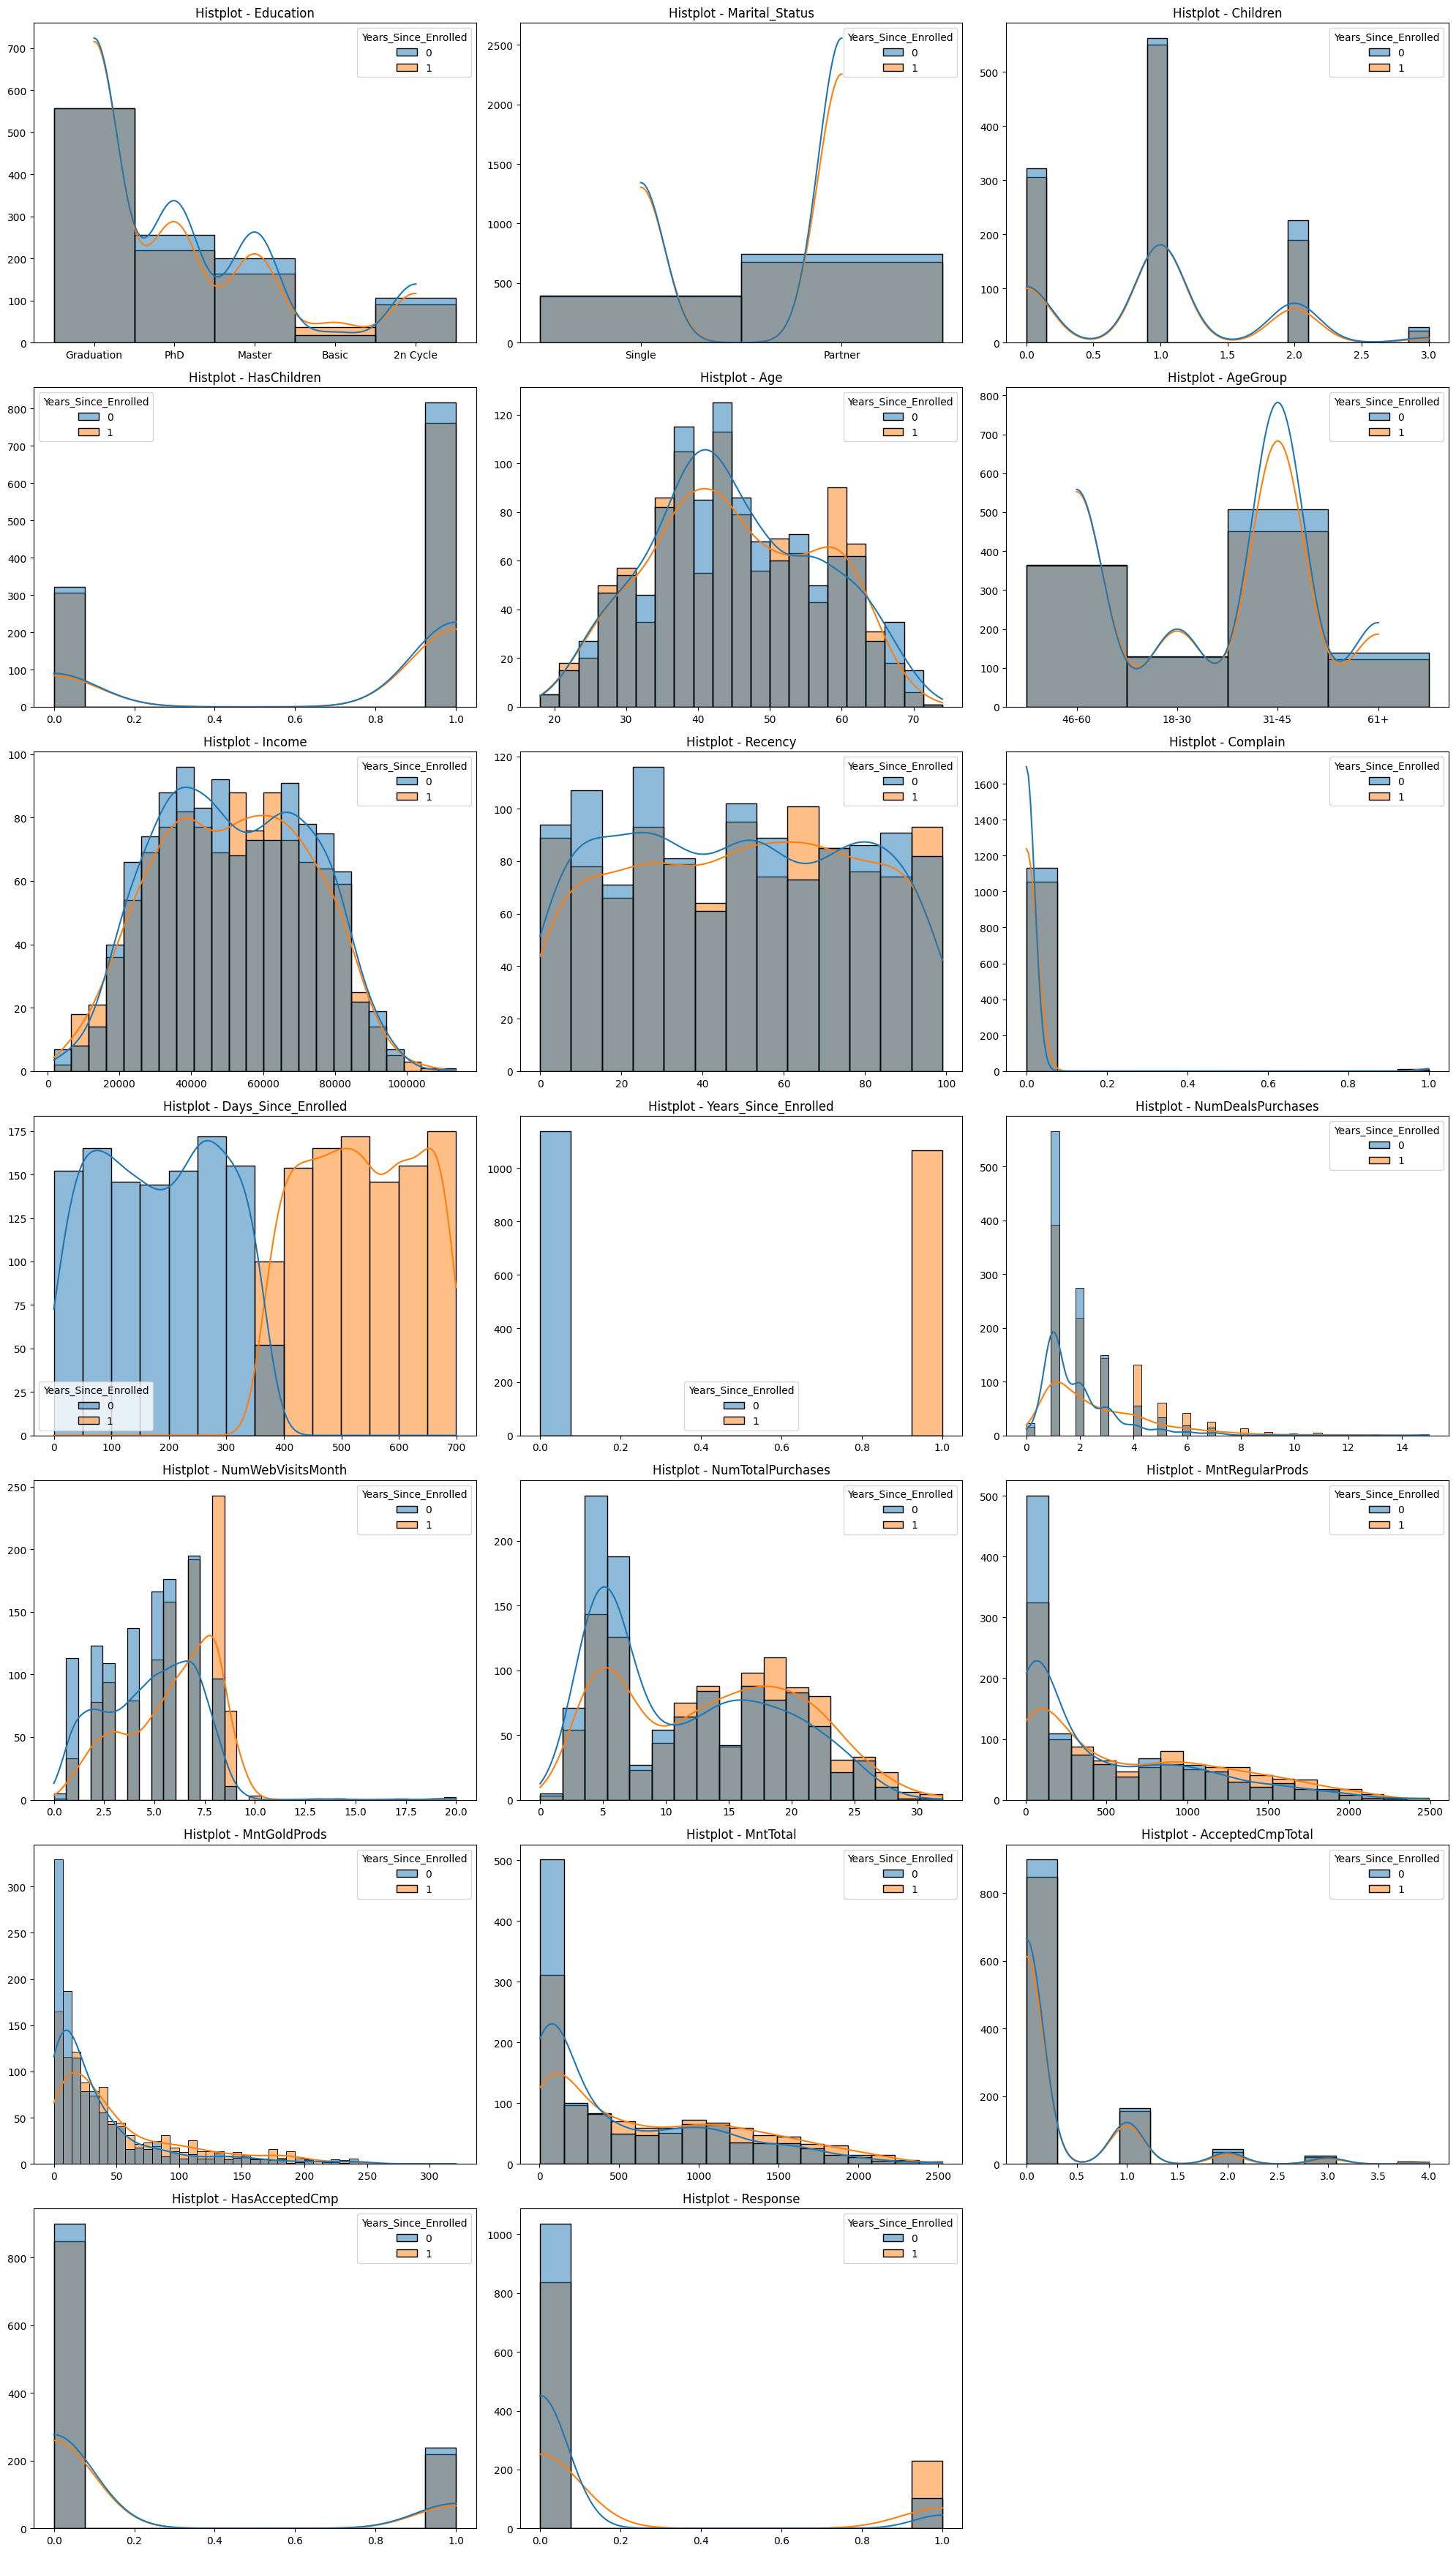

In [12]:
fn_charts.histplots(df, df.columns, hue_columns[4], kde=True) # Criando o histplot com base na lista de hue columns

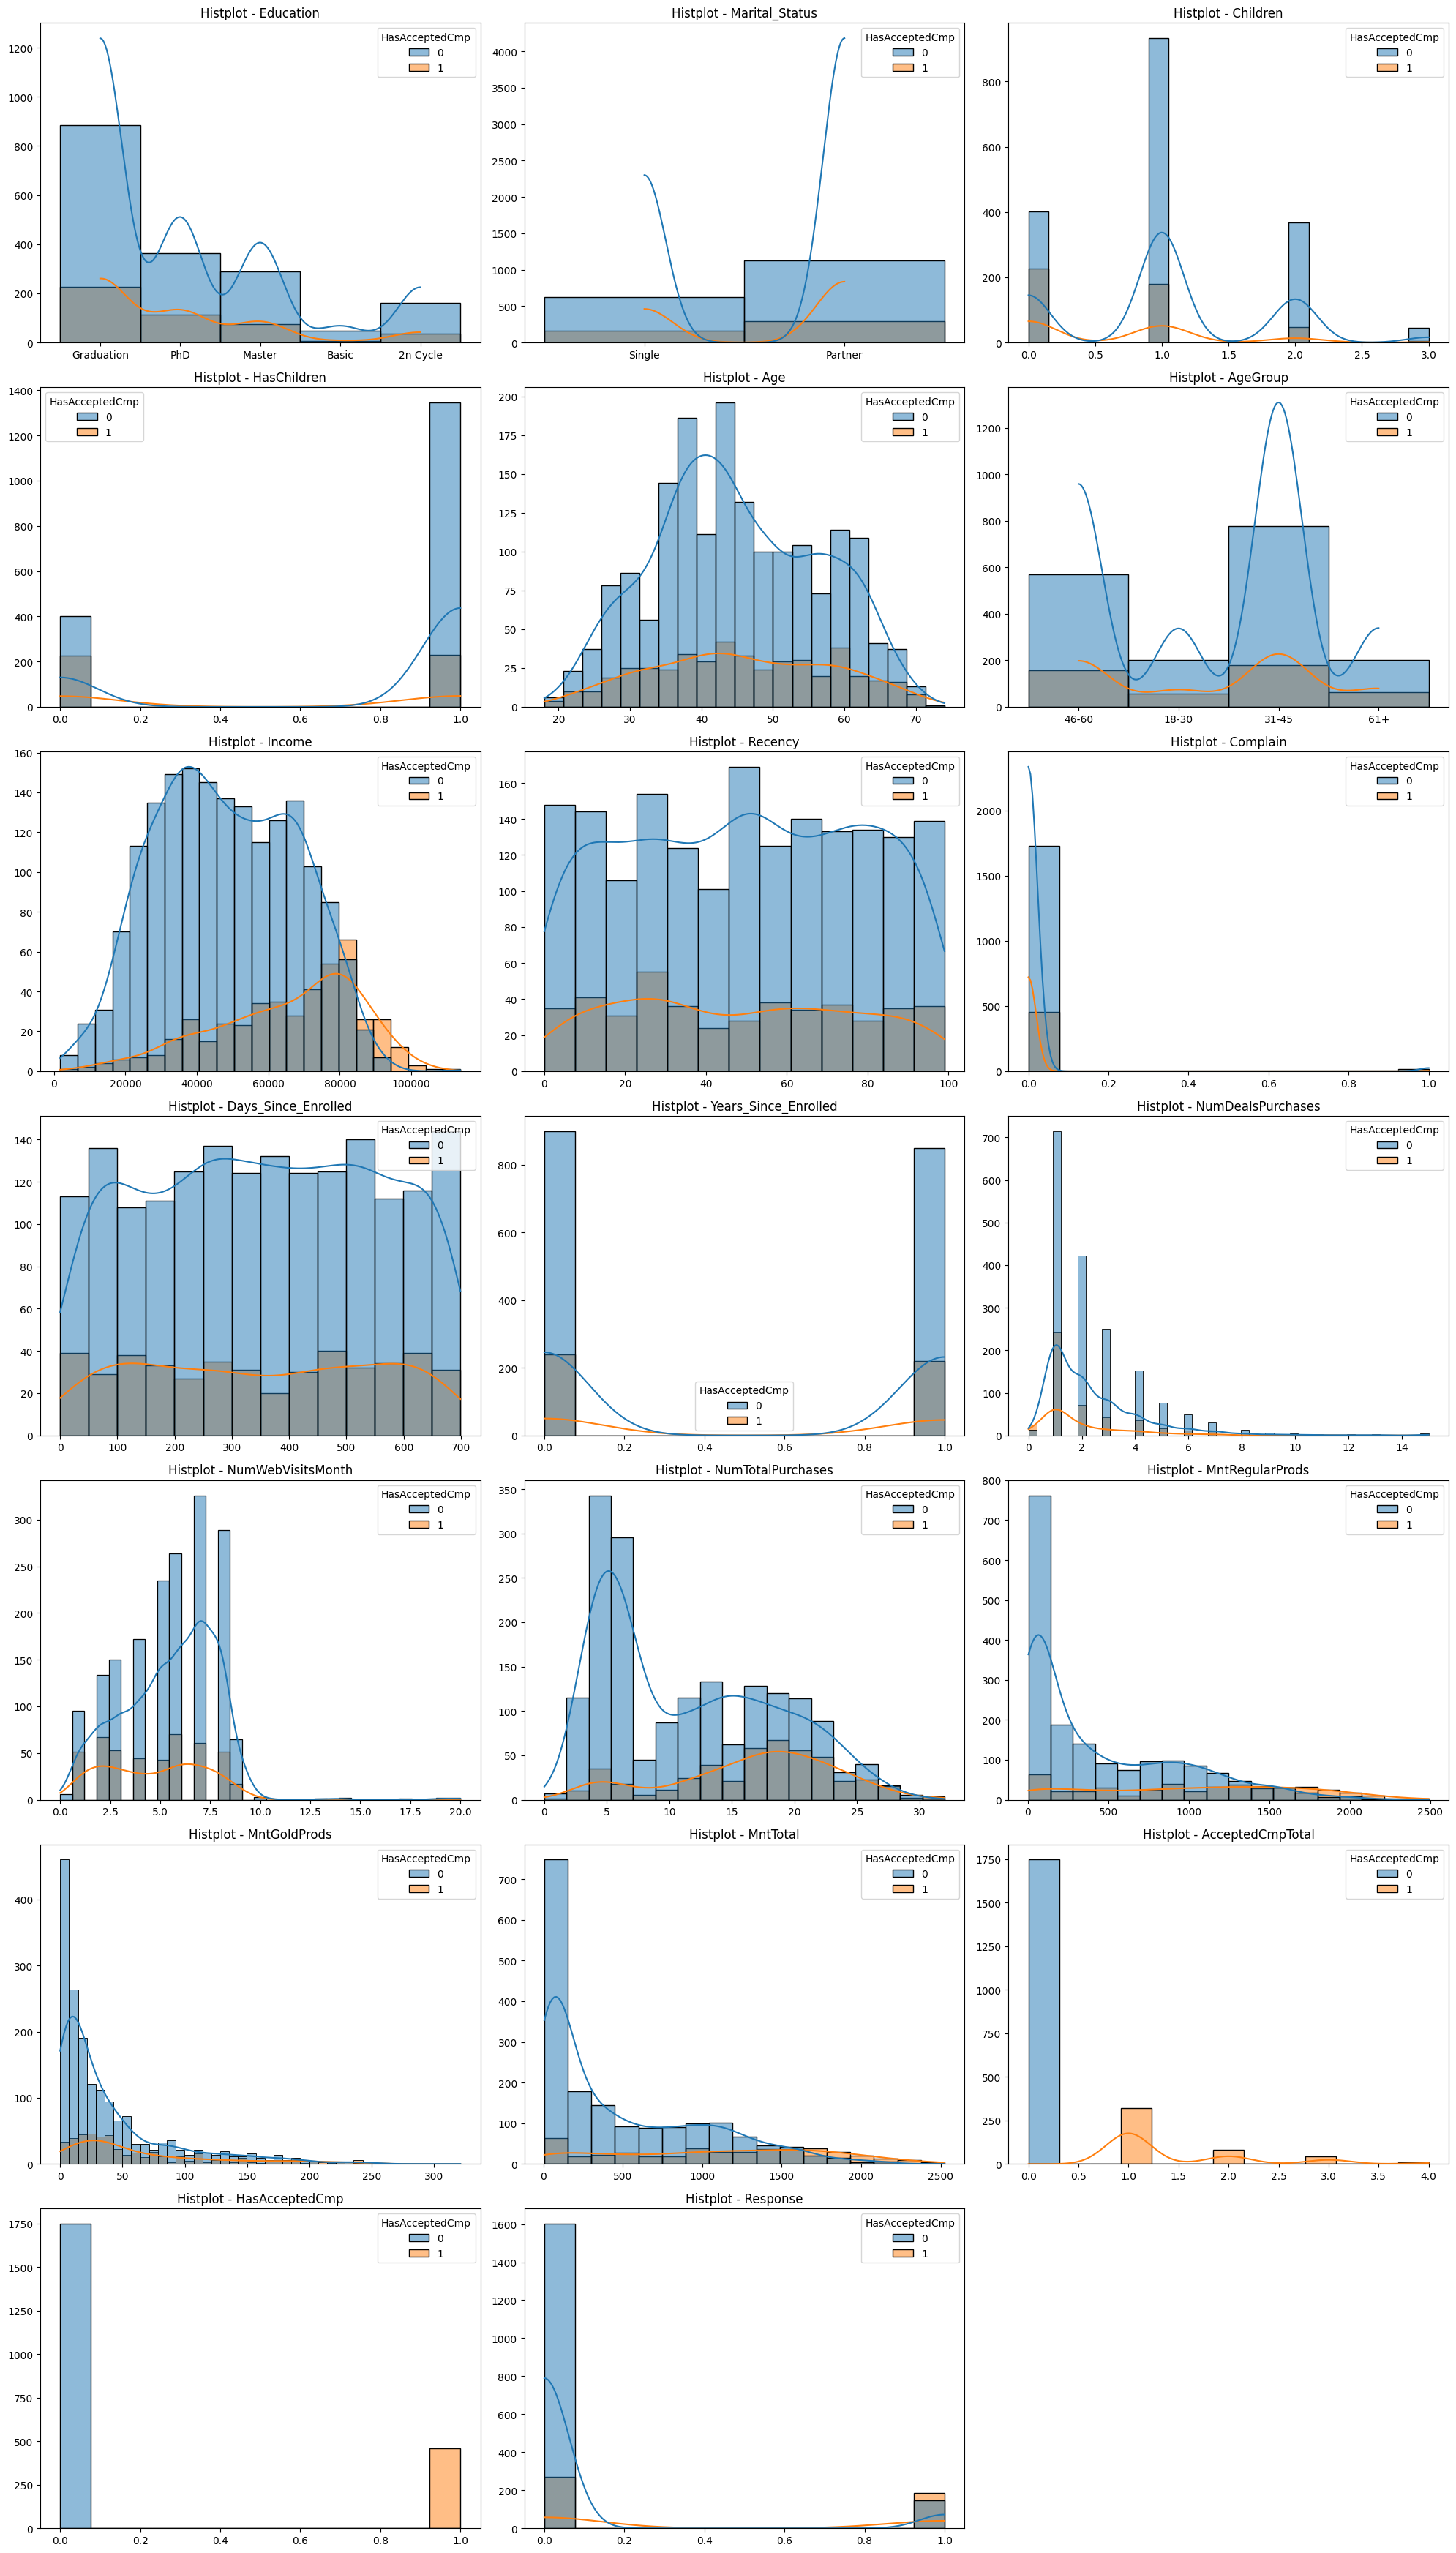

In [13]:
fn_charts.histplots(df, df.columns, hue_columns[5], kde=True) # Criando o histplot com base na lista de hue columns

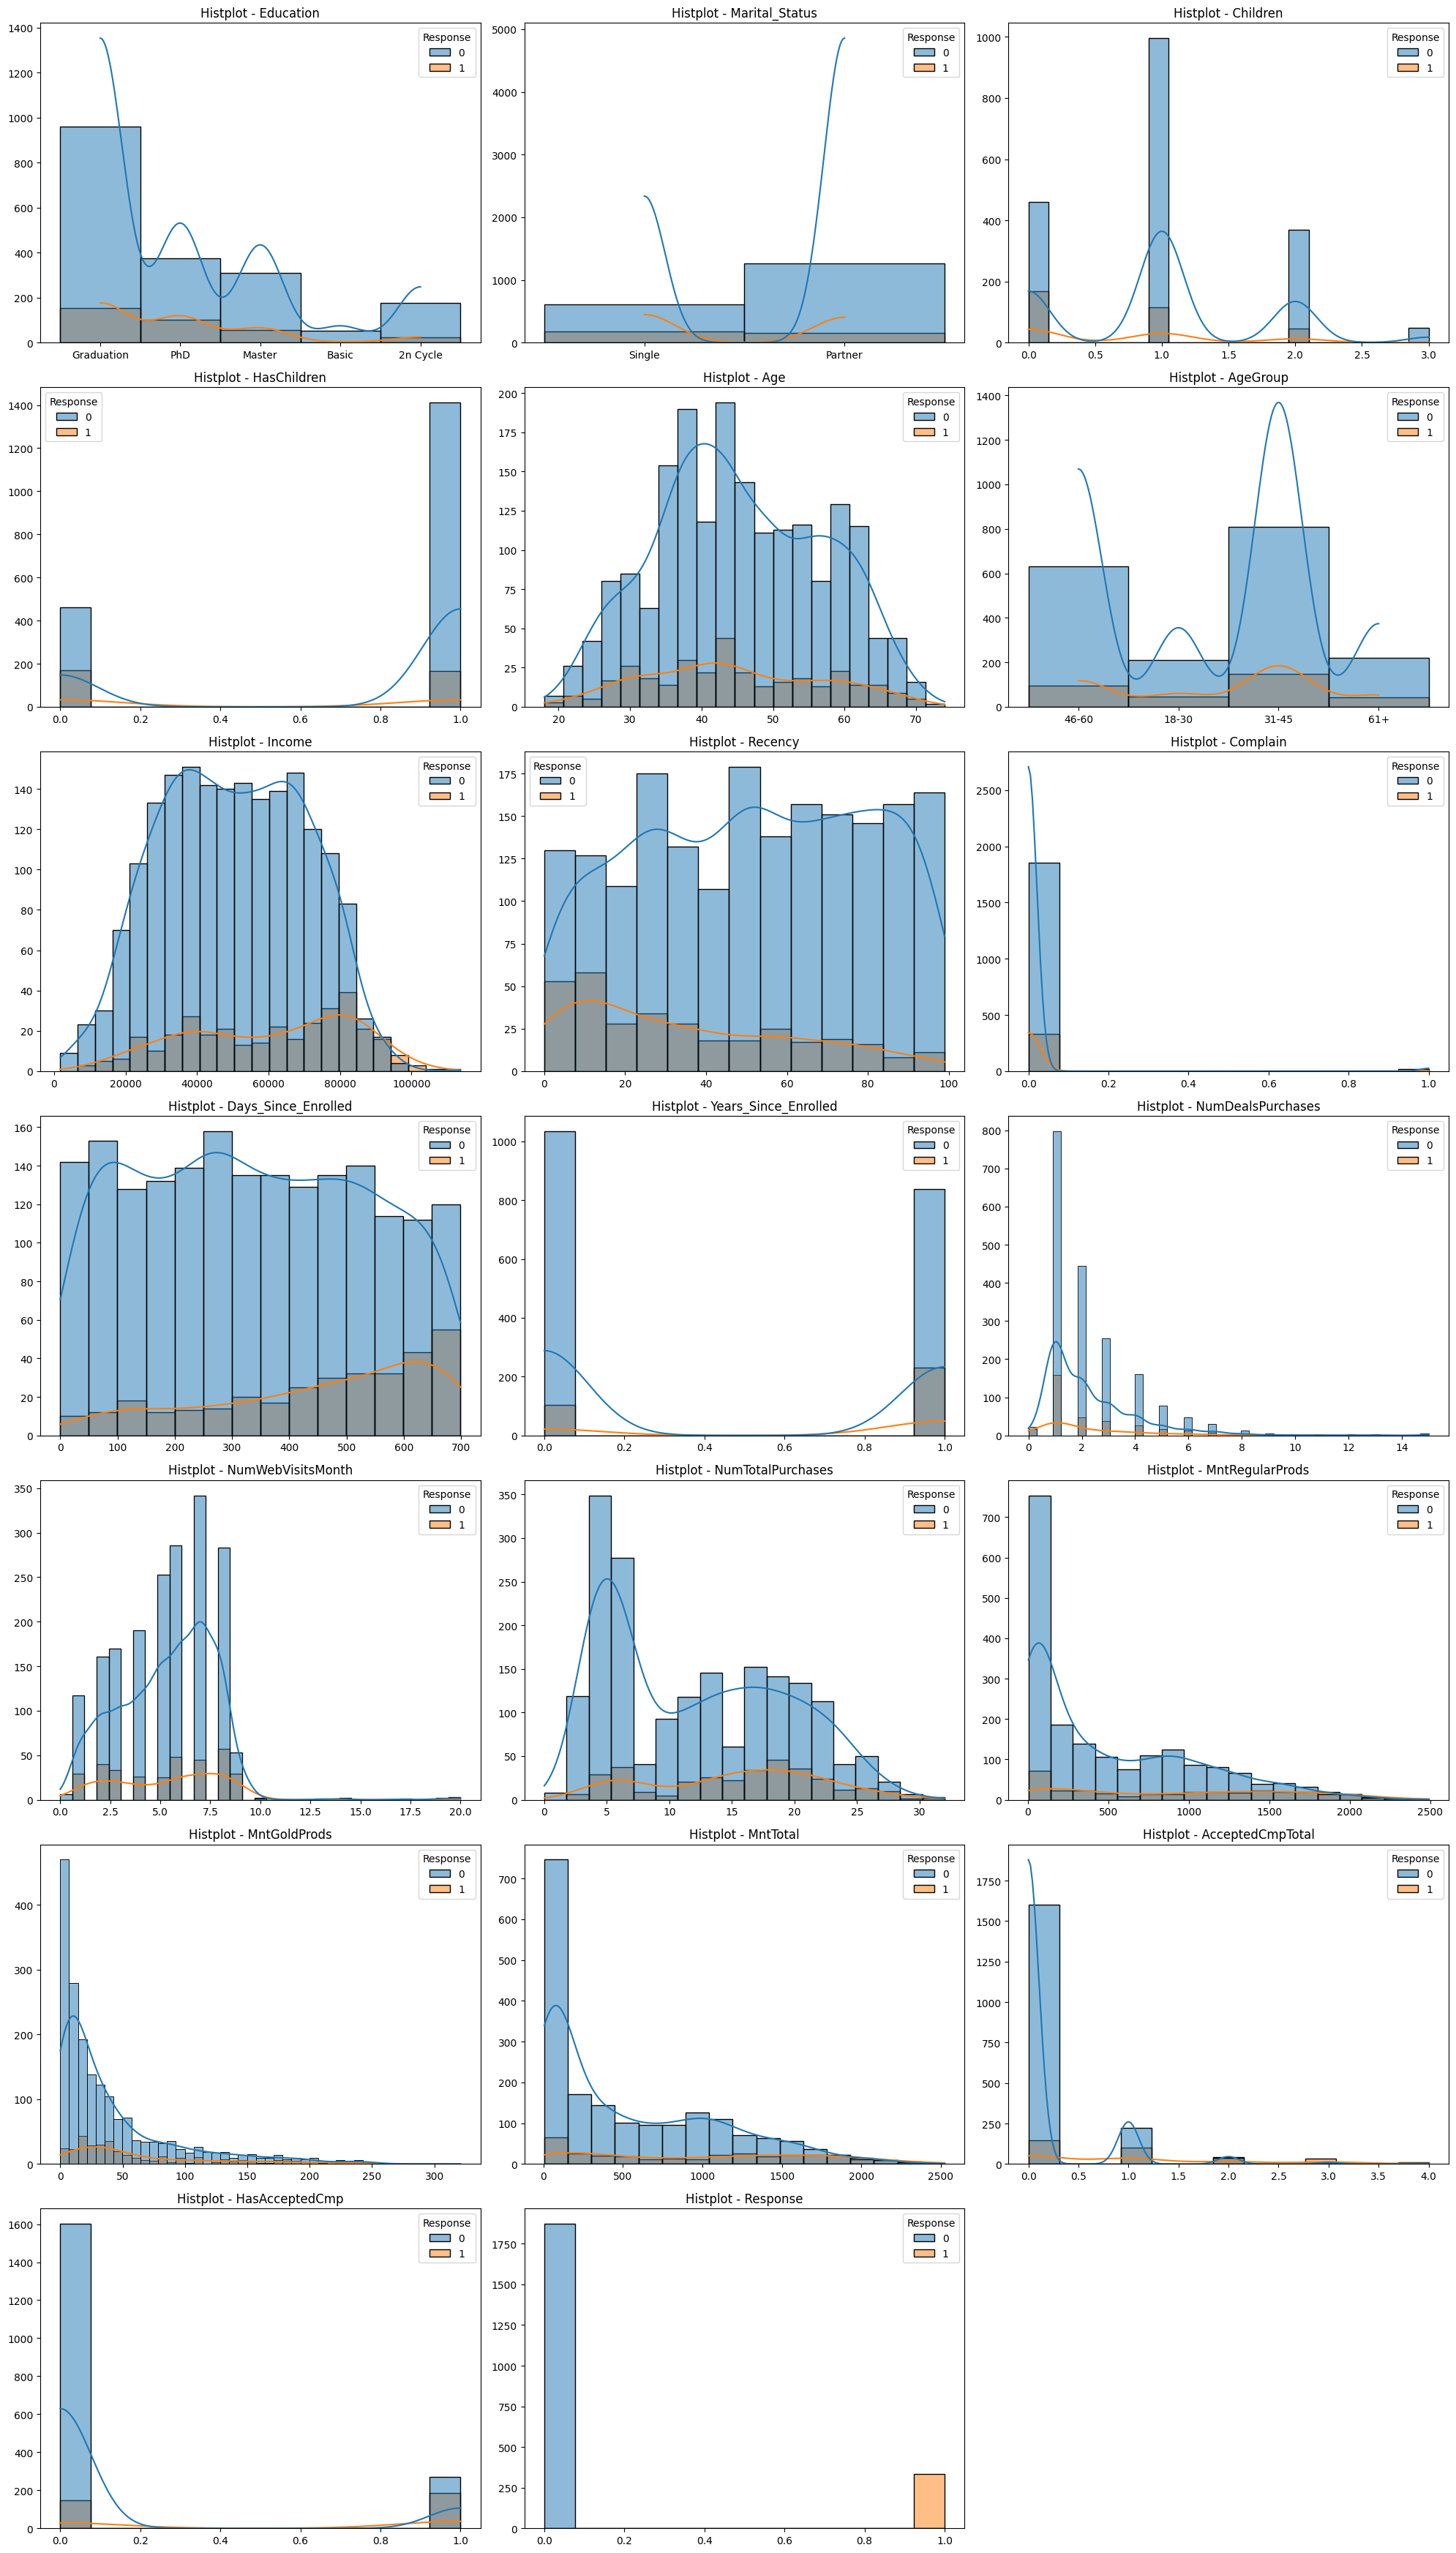

In [14]:
fn_charts.histplots(df, df.columns, hue_columns[6], kde=True) # Criando o histplot com base na lista de hue columns

### Listando os insights encontrados nos histplots

| Hue Column        | Column              | Intensidade | Insight                                                                 |
|-------------------|---------------------|-------------|---------------------------------------------------------------------------|
| HasChildren       | Age                 | Evidente    | Quem tem filhos, tende a ter a idade entre 35 e 60 anos                   |
| HasChildren       | Income              | Evidente    | Quem não tem filhos, tende a ter uma renda maior (o contrário também)      |
| HasChildren       | NumDealsPurchases   | Sutil       | Quem não tem filhos, tende a fazer menos compras com desconto (o contrário também) |
| HasChildren       | NumWebVisitsMonth   | Evidente    | Quem não tem filhos, tende a visitar menos o site de compras (o contrário também)  |
| HasChildren       | NumTotalPurchases   | Evidente    | Quem não tem filhos, tende a fazer mais compras (o contrário também)       |
| HasChildren       | MntTotal            | Sutil       | Quem não tem filhos, tende a gastar mais em compras (o contrário também)   |
| Education         | Income              | Evidente    | Quem tem maior escolaridade, tende a ter uma renda maior (o contrário também) |
| Education         | NumTotalPurchases   | Evidente    | Quem tem maior escolaridade, tende a fazer mais compras (o contrário também) |
| Education         | MntTotal            | Evidente    | Quem tem maior escolaridade, tende a gastar mais em compras (o contrário também) |
| AgeGroup          | Income              | Evidente    | Quem tem mais idade, tende a ter uma renda maior (o contrário também)      |
| AgeGroup          | MntTotal            | Sutil       | Quem tem mais idade, tende a gastar mais em compras (o contrário também)   |
| Years_Since_Enrolled | NumWebVisitsMonth | Sutil       | Quem tem mais tempo como cliente, tende a visitar mais o site (o contrário também) |
| HasAcceptCmp      | Income              | Evidente    | Quem aceitou as campanhas, tende a ter uma renda maior (o contrário também) |
| HasAcceptCmp      | NumTotalPurchases   | Evidente    | Quem aceitou as campanhas, tende a fazer mais compras (o contrário também) |
| HasAcceptCmp      | MntTotal            | Evidente    | Quem aceitou as campanhas, tende a gastar mais em compras (o contrário também) |
| Response          | Income              | Evidente    | Quem aceitou as campanhas, tende a ter uma renda maior (o contrário também) |
| Response          | Recency             | Evidente    | Quem aceitou as campanhas, tende a comprar frequentemente (o contrário também) |
| Response          | Years_Since_Enrolled | Evidente    | Quem aceitou as campanhas, tende a ser cliente há mais tempo (o contrário também) |
| Response          | NumTotalPurchases   | Evidente    | Quem aceitou as campanhas, tende a fazer mais compras (o contrário também) |
| Response          | MntTotal            | Evidente    | Quem aceitou as campanhas, tende a gastar mais em compras (o contrário também) |
| Response          | AcceptedCmpTotal    | Evidente    | Quem aceitou as campanhas, tende a aceitar uma nova campanha (o contrário também) |

### Armazenando as principais colunas dos insights de acordo com sua hue column

In [15]:
columns_HasChildren = ['Age', 'Income', 'NumDealsPurchases', 'NumWebVisitsMonth', 'NumTotalPurchases', 'MntTotal']
columns_Education = ['Income', 'NumTotalPurchases', 'MntTotal']
columns_AgeGroup = ['Income', 'MntTotal']
columns_Years_Since_Enrolled = ['NumWebVisitsMonth']
columns_HasAcceptCmp = ['Income', 'NumTotalPurchases', 'MntTotal']
columns_Response = ['Income', 'Recency', 'Years_Since_Enrolled', 'NumTotalPurchases', 'MntTotal', 'AcceptedCmpTotal']

### Corroborando os insights encontrados nos histplots através de boxplots

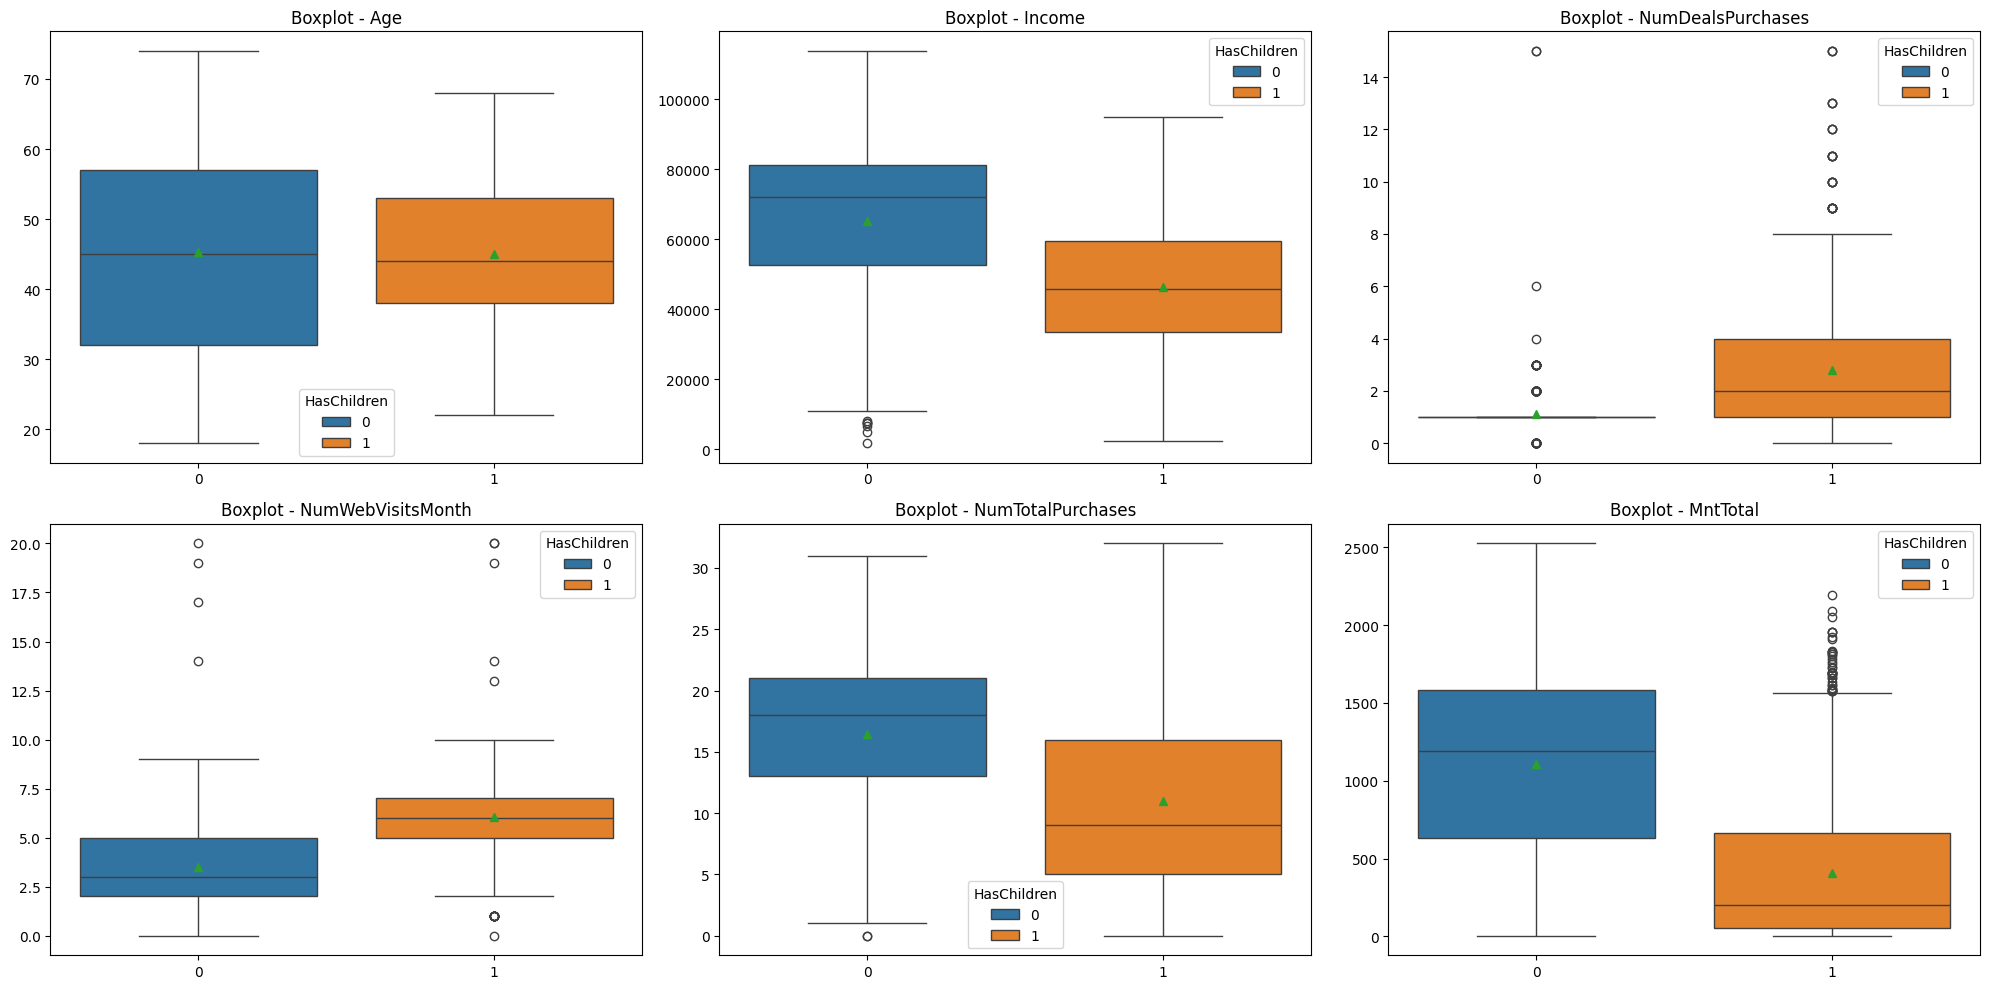

In [16]:
fn_charts.boxplots(df, columns_HasChildren, hue_columns[0]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

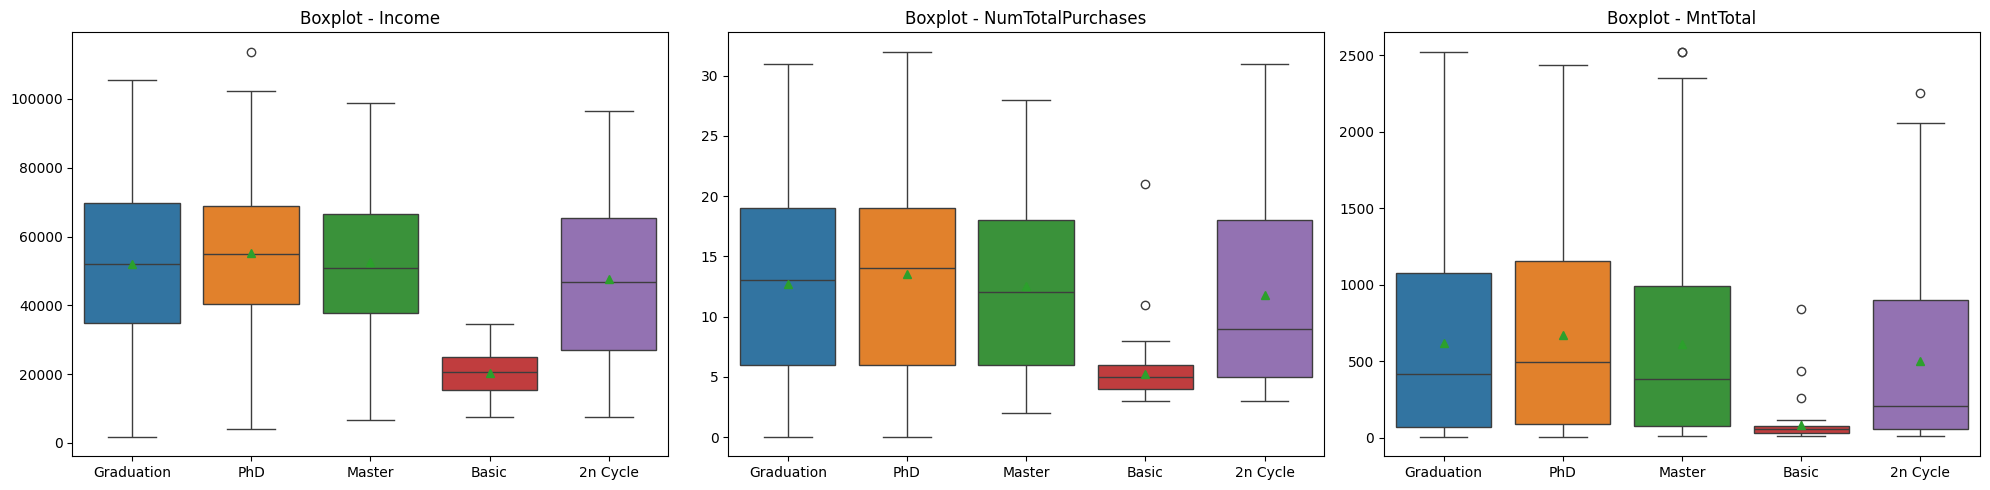

In [17]:
fn_charts.boxplots(df, columns_Education, hue_columns[2]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

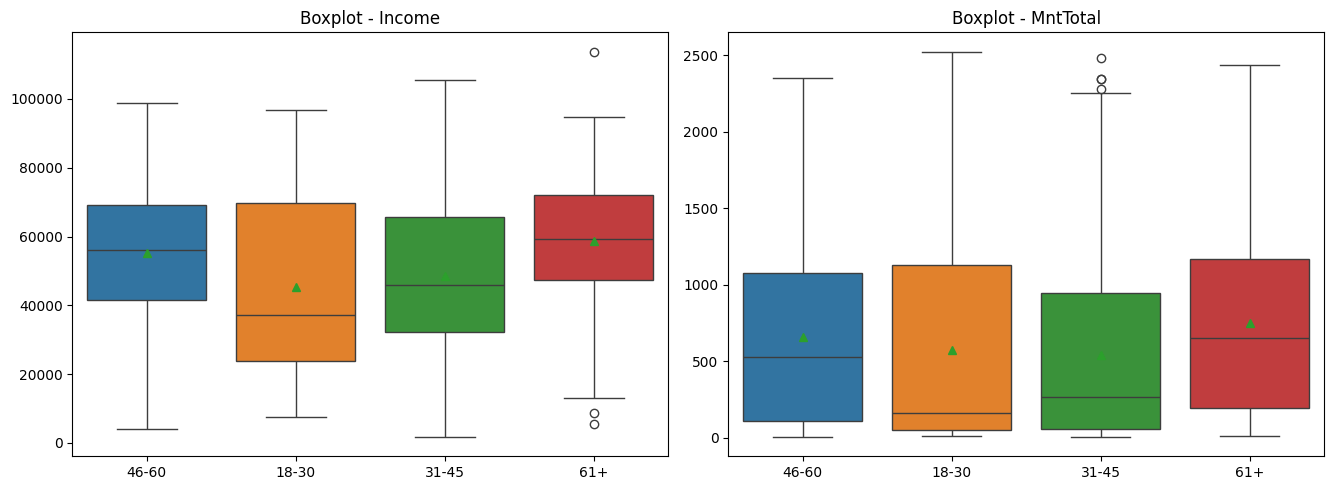

In [18]:
fn_charts.boxplots(df, columns_AgeGroup, hue_columns[3]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

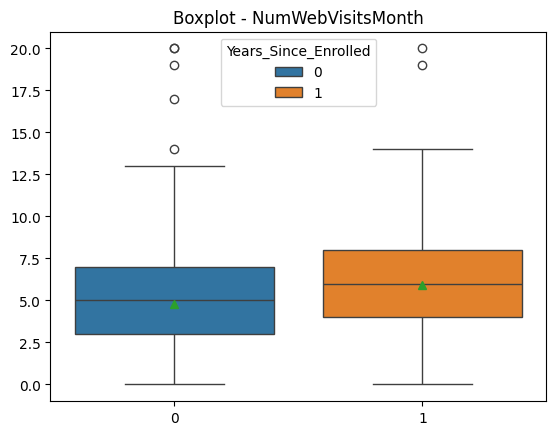

In [19]:
fn_charts.boxplot(df, columns_Years_Since_Enrolled, hue_columns[4]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

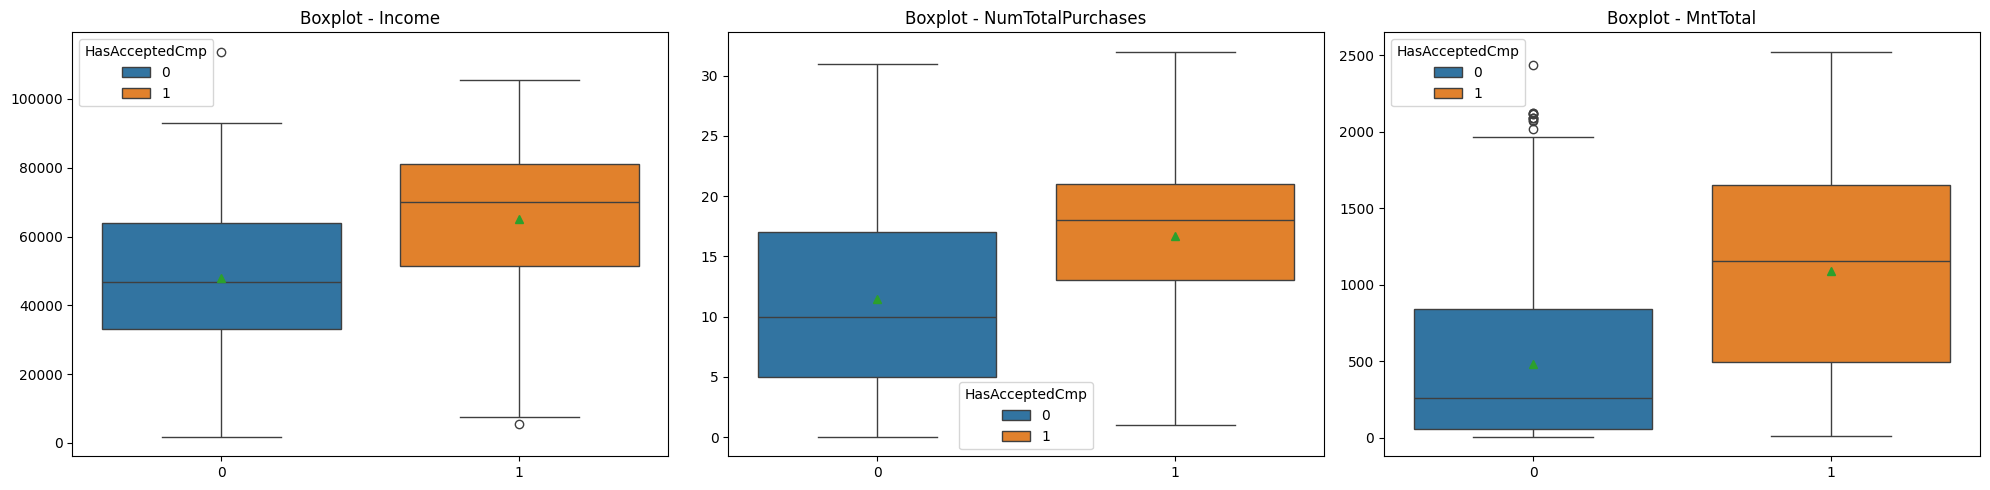

In [20]:
fn_charts.boxplots(df, columns_HasAcceptCmp, hue_columns[5]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

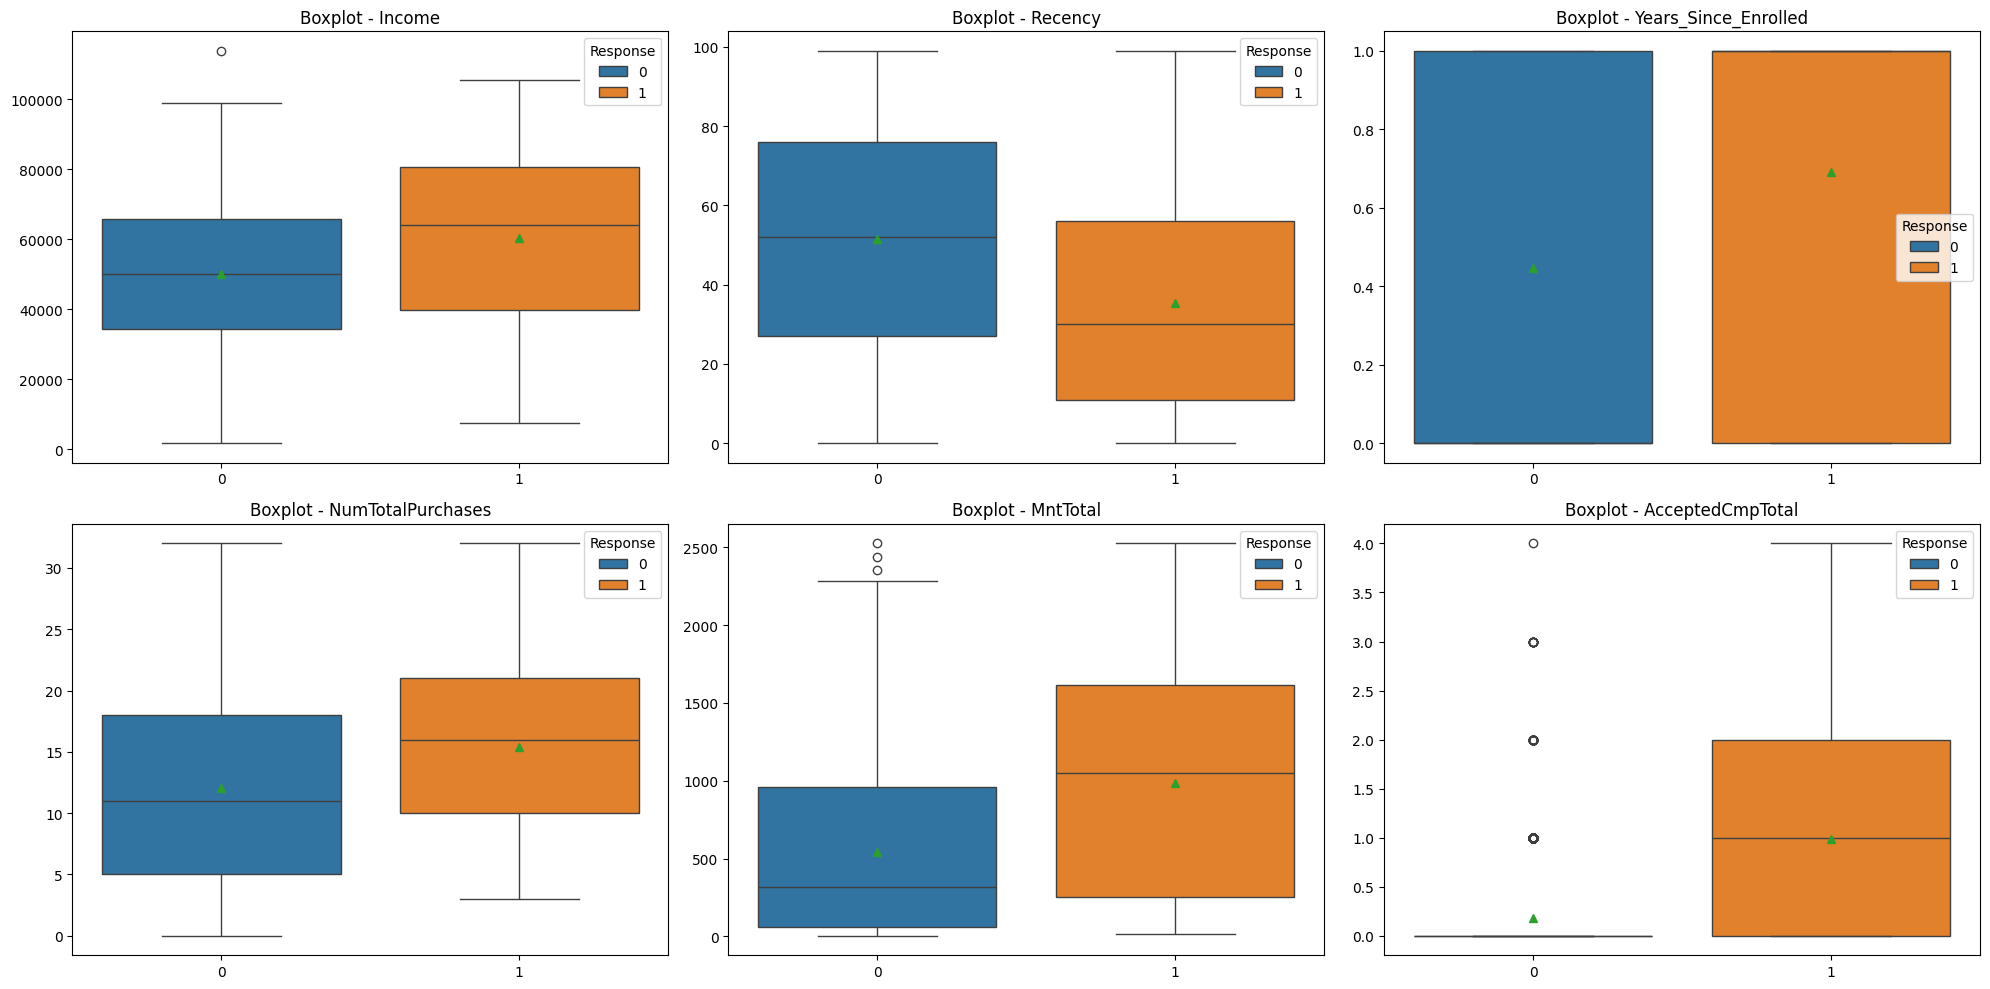

In [21]:
fn_charts.boxplots(df, columns_Response, hue_columns[6]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

### Corroborando os insights encontrados nos histplots através de um heatmap

In [22]:
df_dummies = pd.get_dummies(df) # Criando uma variável com o dataset dummies, que transforma variáveis categóricas em numéricas
df_heatmap = df_dummies.corr() # Criando uma variável com o dataset com dados de 0 a 1 para ser usado em um heatmap

In [23]:
df_dummies.to_csv(consts.DATASET_DUMMIES, index=False) # Salvando o dataset dummies

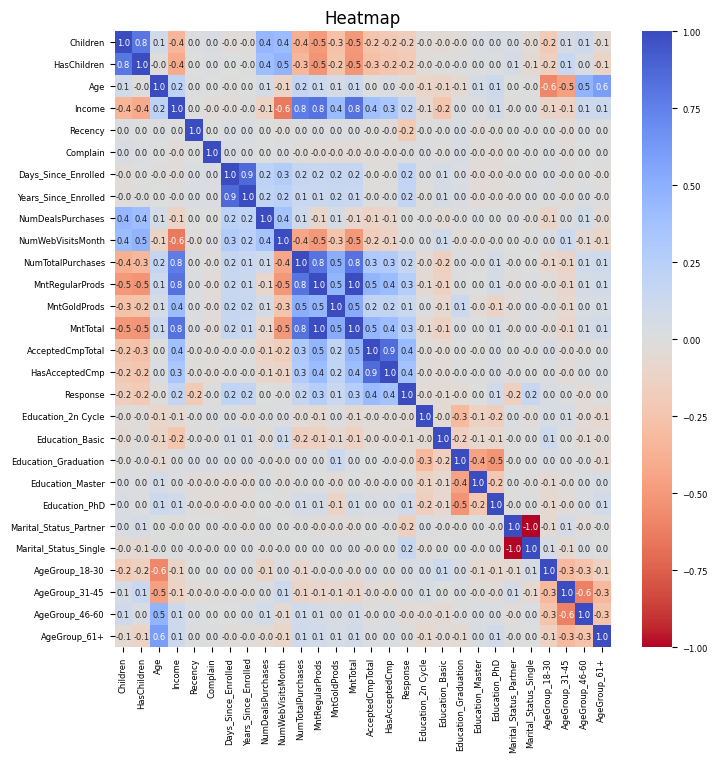

In [24]:
fn_charts.heatmap(df_heatmap) # Criando o heatmap

### Corroborando os insights encontrados nos histplots através de barplots e possivelmente gerando novos insights

In [25]:
df_heatmap_unstack = pd.DataFrame(df_heatmap.unstack()) # Fazendo o unstack do dataset do heatmap
df_heatmap_unstack = df_heatmap_unstack.rename(columns={0: 'correlation'}) # Alterando o nome da coluna de correlações

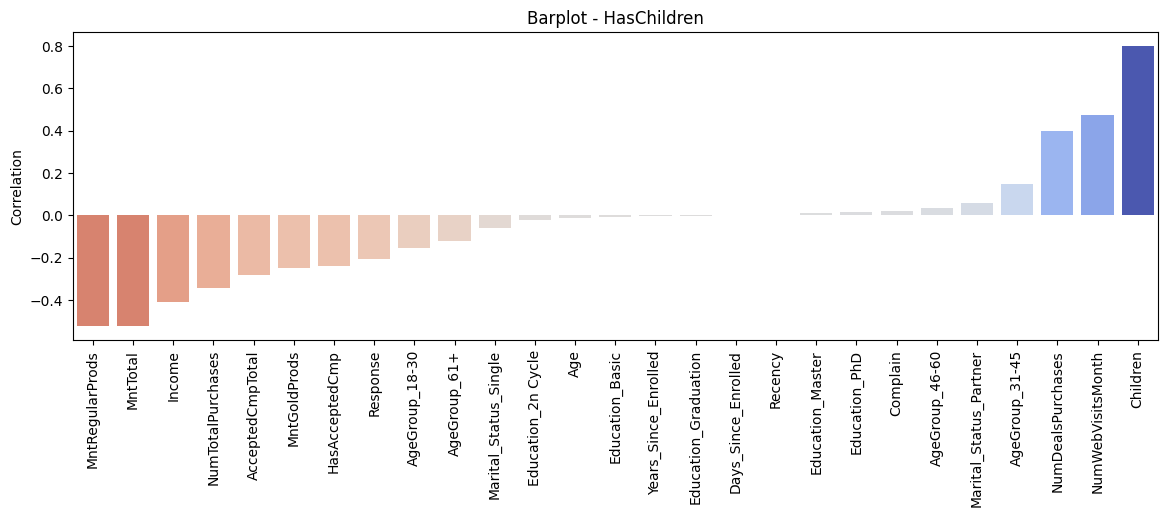

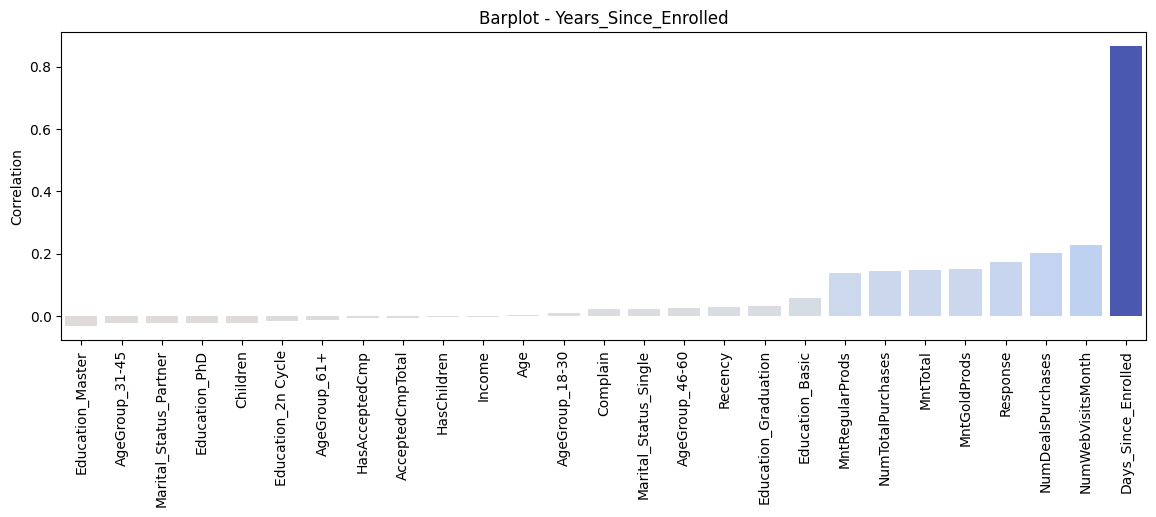

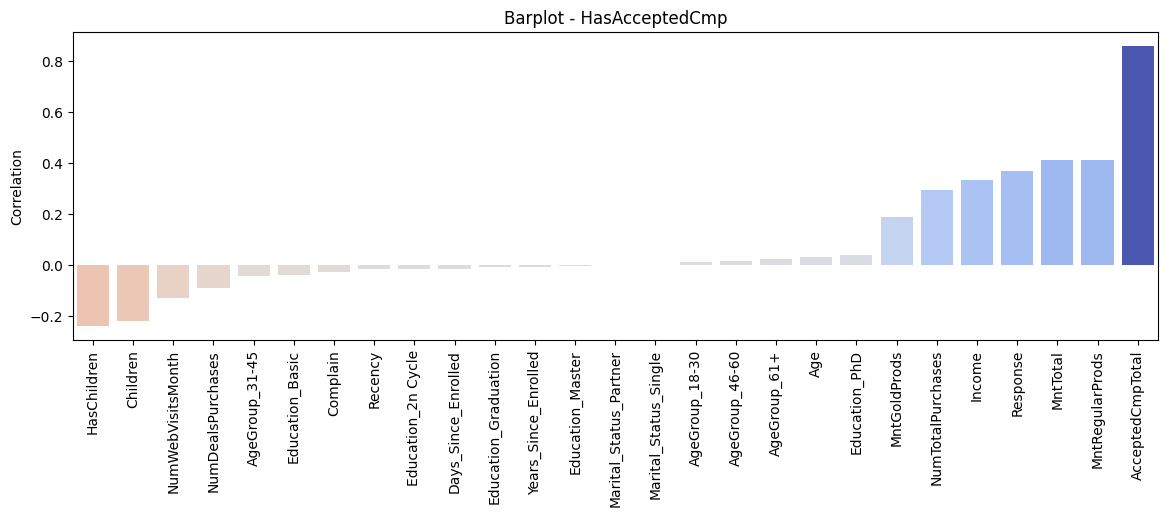

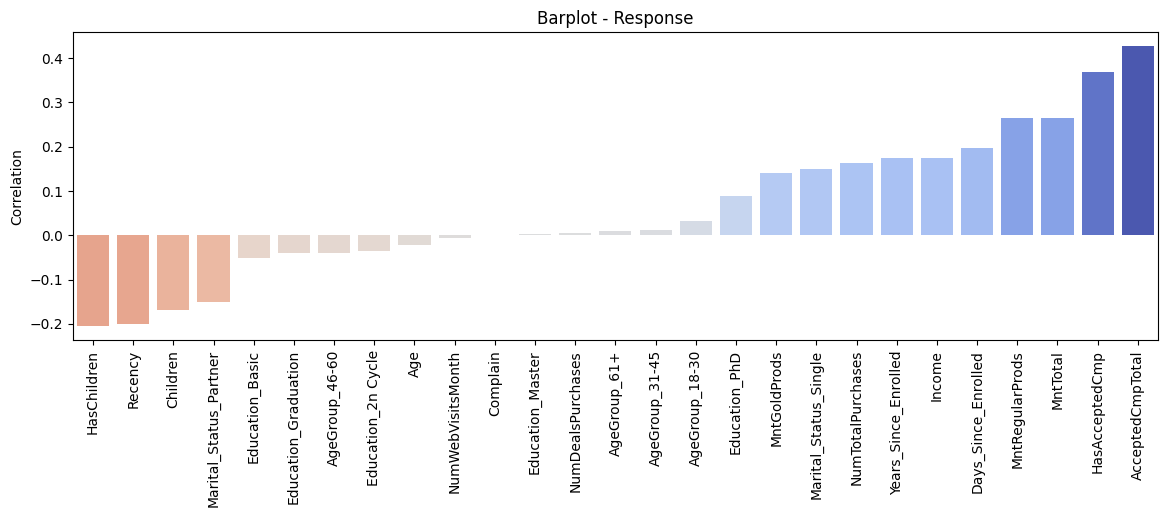

In [26]:
for column in [hue_columns[i] for i in [0, 4, 5, 6]]: # Criando uma estrutura de repetição para gerar os gráficos, apenas para colunas que não eram categóricas e foram substituídas por numéricas
    corr = df_heatmap_unstack.loc[column].sort_values(by='correlation')[:-1] # Filtrando e classificando o dataset apenas pela coluna hue
    fn_charts.barplot(corr, corr['correlation'], corr['correlation'].max(), column) # Criando o gráfico com o valor máximo na escala

### Identificando os grupos com base nas análises anteriores

Nessa análise exploratória inicial, após o detalhamento dos gráficos estatísticos acima, podemos identificar 2 grupos na tabela abaixo com base nos objetivos do projeto, de forma qualitativa e quantitativa. 

Sobre a abordagem quantitativa, os valores usados como referência foram as medianas dos valores.

| **Grupo 1**        | **Grupo 1**           | **Grupo 2**       | **Grupo 2**          |
|-----------------------------------|---------------------------------------|-----------------------------------|--------------------------------------|
| **Qualitativo**         | **Quantitativo**           | **Qualitativo**         | **Quantitativo**           |
| Renda média alta                  | Renda >= 51.287,00                     | Renda média baixa                 | Renda < 51.287,00                    |
| Faz mais compras                  | Compras >= 12                         | Faz menos compras                 | Compras < 12                        |
| Gasta mais em compras             | Gastos em compras >= 397,00           | Gasta menos em compras            | Gastos em compras < 397,00          |
| Não tem filhos                    | Filhos = 0                            | Tem filhos                        | Filhos != 0                         |
| Faz menos compras com desconto    | Compras com desconto <= 2             | Faz mais compras com desconto     | Compras com desconto > 2            |
| Visita menos o site               | Visitas ao site <= 6                  | Visita mais o site                | Visitas ao site > 6                 |
| Tem maior escolaridade            | Escolaridade != Basic                 | Tem menor escolaridade            | Escolaridade = Basic                |
| **Aceita mais campanhas**             | **Aceitou campanhas = 1**                 | **Aceita menos campanhas**            | **Aceitou campanhas = 0**               |
| Compra com mais frequência        | Frequência de compras <= 49           | Compra com menos frequência       | Frequência de compras > 49          |
| É cliente a mais tempo            | Dias como cliente >= 356              | É cliente a menos tempo           | Dias como cliente < 356             |
| Não possui um parceiro            | Estado civil = Single                 | Possui um parceiro                | Estado civil = Partner              |

### Listando as sugestões de melhorias

Com base nas conclusões encontradas acima, é possível sugerir as seguintes sugestões de melhoria:
1. Visando criar uma campanha com alta taxa de adesão dos clientes, uma boa sugestão é focar as campanhas nos clientes do Grupo 1

### Estimando o impacto da aplicação das sugestões de melhorias

Mostrando a evolução antes e depois de aplicar as melhorias sugeridas:

In [27]:
display(df['Response'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando a porcentagem de conversão da campanha inicialmente

Response
0    84.9%
1    15.1%
Name: proportion, dtype: object

In [28]:
# Atualizando o dataframe conforme as sugestões apontadas  
df = df[df['Income']>=51287.00]
df = df[df['NumTotalPurchases']>=12]
df = df[df['MntTotal']>=397.00]
df = df[df['HasChildren']==0]
df = df[df['NumDealsPurchases']<=2]
df = df[df['NumWebVisitsMonth']<=6]
df = df[df['Education']!='Basic']
df = df[df['HasAcceptedCmp']==1]
df = df[df['Recency']<=49]
df = df[df['Days_Since_Enrolled']>=356]
df = df[df['Marital_Status']=='Single']

In [29]:
display(df['Response'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando a porcentagem de conversão da campanha posteriormente

Response
1    100.0%
Name: proportion, dtype: object

In [30]:
df # Exibindo o dataset

Education Marital_Status  Children  HasChildren  Age AgeGroup  \
14           PhD         Single         0            0   68      61+   
55        Master         Single         0            0   32    31-45   
71    Graduation         Single         0            0   38    31-45   
238   Graduation         Single         0            0   40    31-45   
264          PhD         Single         0            0   28    18-30   
320   Graduation         Single         0            0   46    46-60   
401   Graduation         Single         0            0   33    31-45   
413          PhD         Single         0            0   53    46-60   
439     2n Cycle         Single         0            0   48    46-60   
696     2n Cycle         Single         0            0   54    46-60   
800          PhD         Single         0            0   34    31-45   
894   Graduation         Single         0            0   20    18-30   
1064      Master         Single         0            0   44    31-45   
1091    2n Cycle         Single         0            0   31    31-45   
1545         PhD         Single         0            0   68      61+   
2188      Master         Single         0            0   32    31-45   

        Income  Recency  Complain  Days_Since_Enrolled  Years_Since_Enrolled  \
14     82800.0       23         0                  582                     1   
55     75777.0       12         0                  360                     0   
71     75825.0       40         0                  625                     1   
238   102692.0        5         0                  450                     1   
264    69867.0       30         0                  453                     1   
320    75693.0       10         0                  570                     1   
401    91065.0       33         0                  492                     1   
413    84865.0        1         0                  416                     1   
439    89572.0       44         0                  652                     1   
696    87305.0       19         0                  644                     1   
800    76412.0       15         0                  420                     1   
894    95529.0       29         0                  573                     1   
1064   75345.0       16         0                  512                     1   
1091   81698.0        1         0                  485                     1   
1545   82800.0       23         0                  582                     1   
2188   75777.0       12         0                  360                     0   

      NumDealsPurchases  NumWebVisitsMonth  NumTotalPurchases  \
14                    1                  3                 25   
55                    1                  1                 20   
71                    0                  4                 22   
238                   1                  2                 28   
264                   1                  1                 16   
320                   1                  4                 21   
401                   1                  3                 25   
413                   1                  4                 15   
439                   1                  4                 23   
696                   1                  2                 16   
800                   1                  3                 17   
894                   1                  3                 17   
1064                  1                  3                 19   
1091                  1                  5                 15   
1545                  1                  3                 25   
2188                  1                  1                 20   

      MntRegularProds  MntGoldProds  MntTotal  AcceptedCmpTotal  \
14               1270            45      1315                 2   
55               1358            80      1438                 2   
71               2158            51      2209                 1   
238               964           148      1112  

### Conclusão

Após aplicar as sugestões de melhorias indicadas nessa análise exploratória do projeto, estimamos a evolução da coluna target (Response). 

Essa coluna Response corresponde a quantidade de clientes que aceitaram ou não a campanha final desse projeto piloto. 

Como resultado, inicialmente tínhamos um total de conversão de clientes de **15,1%** e após a aplicação das sugestões apontadas o total de conversão foi para **100,00%**, representando assim um **crescimento relativo de 562,2%** e um **crescimento absoluto de 84,9%**.

O resultado encontrado foi o ideal, onde **o objetivo máximo do projeto foi atingido**. O único ponto de ressalva é que foram aplicadas muitas condições para se chegar a esse resultado, deixando assim o número de clientes mais restrito. Dessa forma, é preciso discutir com a área de Negócios para estabelecer se esse resultado atende as necessidades da área ou é preciso fazer ajustes, como por exemplo reduzir o número de parâmetros para que a campanha possa atingir um número maior de clientes.